# Analyse du Taux d'Attrition - HumanForYou

## Projet d'Intelligence Artificielle

Contexte : 

L'entreprise pharmaceutique HumanForYou (basée en Inde, ~4000 employés) connaît un taux de rotation d'environ 15% par an. La direction souhaite identifier les facteurs influençant ce taux et proposer des pistes d'amélioration pour fidéliser les employés.

Objectifs :
1. Explorer et analyser les données des employés
2. Identifier les facteurs clés d'attrition
3. Construire des modèles prédictifs
4. Évaluer et comparer les performances
5. Proposer des recommandations



### Structure du Notebook

#### [1. Configuration et Imports](#1.-Configuration-et-Imports) (Cellules 2-3)

Configuration de l'environnement Python et import des bibliothèques de base

Import des modules du dossier src/

Import des bibliothèques ML (sklearn, XGBoost, LightGBM, SHAP)

Ces cellules doivent être exécutées en premier

#### [2. Chargement des Données](#2.-Chargement-des-Données) (Cellules 6-13)

Chargement des fichiers CSV (employee_survey, manager_survey, general_data)

Traitement des données de pointage (in_time/out_time)

Calcul du temps de travail moyen par employé

Fusion des différents dataset

Vérifier la présence de `general_data.csv` pour disposer de la variable `Attrition`

#### [3. Analyse Exploratoire (EDA)](#3.-Analyse-Exploratoire-(EDA)) (Cellules 17-25)

Aperçu du dataset (dimensions, types de données, utilisation mémoire)

Statistiques descriptives des variables

Analyse des valeurs manquantes avec visualisation (missingno)

Distribution de la variable cible (Attrition)

Analyse détaillée de l'attrition selon différentes catégories avec visualisations interactives

Extraction d'insights sur les taux d'attrition par département, niveau de formation, équilibre vie-travail

#### [4. Prétraitement des Données](#4.-Prétraitement-des-Données) (Cellules 33-36)

Traitement des valeurs manquantes (médiane pour les variables numériques, mode pour les catégorielles)

Encodage de la variable cible (`Attrition`: Yes→1, No→0)

Encodage des variables catégorielles avec LabelEncoder

Préparation du dataset pour la phase de modélisation

#### [5. Feature Engineering](#5.-Feature-Engineering) (Cellule 38)

Création de nouvelles variables dérivées:

TenureRatio: ratio d'ancienneté relatif

PromotionStagnation: temps depuis la dernière promotion

OverallSatisfaction: score de satisfaction global

IncomePerYear: revenu normalisé par année d'expérience

Enrichissement du dataset avec des variables calculées

#### [6. Préparation des Données pour le Modèle](#6.-Préparation-des-Données-pour-le-Modèle) (Cellules 40-42)

Test rapide avec LazyPredict (optionnel) permettant d'évaluer environ 40 algorithmes

Division train/test (80/20) avec stratification pour préserver les proportions

Normalisation des variables avec StandardScaler

Étape essentielle avant l'entraînement des modèles

#### [7. Entraînement et Évaluation des Modèles](#7.-Entraînement-et-Évaluation-des-Modèles) (Cellules 44-48)

Entraînement de 10 modèles de machine learning:

1. Logistic Regression
2. Random Forest
3. Gradient Boosting
4. XGBoost
5. LightGBM
6. SVM
7. KNN
8. Decision Tree
9. Naive Bayes
10. AdaBoost

Évaluation avec plusieurs métriques: Accuracy, Precision, Recall, F1-Score, AUC-ROC

Phase centrale de l'analyse prédictive

#### [8. Visualisations et Comparaisons](#8.-Visualisations-et-Comparaisons) (Cellules 48-61)

Tableau récapitulatif des performances de tous les modèles

Graphique en barres pour la comparaison multi-métriques

Graphique radar offrant une vue comparative à 360°

Graphiques de corrélation (F1 vs AUC, Precision vs Recall)

Superposition des courbes ROC de tous les modèles

Matrices de confusion pour le meilleur modèle et l'ensemble des modèles

Support pour la sélection du modèle optimal

#### [9. Importance des Features](#9.-Importance-des-Features) (Cellules 61-63)

Calcul de l'importance des variables avec Random Forest

Visualisation des 15 variables les plus influentes

Analyse SHAP optionnelle pour des explications détaillées

Identification des facteurs déterminants de l'attrition

#### [10. Benchmarks et Résumé des Performances](#10.-Benchmarks-et-Résumé-des-Performances) (Cellule 65)

Synthèse consolidée de tous les benchmarks réalisés

Classement des 3 meilleurs modèles

Statistiques globales du dataset

Vue d'ensemble complète des résultats obtenus

#### [11. Conclusions et Recommandations](#11.-Conclusions-et-Recommandations) (Cellules 67-68)

Identification des principaux facteurs d'attrition (satisfaction, équilibre vie-travail, ancienneté, rémunération, distance)

Recommandations stratégiques pour HumanForYou:

Actions à court terme: ciblage des employés à risque, entretiens individuels, révision des grilles salariales

Actions à moyen terme: plans de carrière structurés, politique de télétravail, programmes de formation

Actions à long terme: système de monitoring continu, amélioration de la culture d'entreprise, tableaux de bord RH

Limites de l'analyse et perspectives d'amélioration

Synthèse opérationnelle destinée à la direction

## 1. Configuration et Imports

In [1]:
# Configuration des warnings
import warnings
warnings.filterwarnings('ignore')

# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Configuration de l'affichage
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Ajouter le chemin du projet au PYTHONPATH
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Configuration de base terminée")

Configuration de base terminée


In [2]:
# Import des modules du projet
try:
    from src.data_loader import load_all_data, merge_datasets, display_dataset_summary
    from src.data_preprocessing import preprocess_pipeline, handle_missing_values, encode_target_variable
    from src.feature_engineering import feature_engineering_pipeline, create_derived_features
    from src.models import train_and_evaluate_all_models, get_feature_importance
    from src.visualization import (
        plot_target_distribution, plot_numeric_distributions, 
        plot_correlation_matrix, plot_correlation_with_target,
        plot_confusion_matrix, plot_roc_curves, 
        plot_feature_importance, plot_model_comparison
    )
    print("Modules du projet importés avec succès")
except ImportError as e:
    print(f"Erreur d'import: {e}")
    print("Les fonctions seront définies localement si nécessaire")

Modules du projet importés avec succès


In [3]:
# Imports ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)

# XGBoost (optionnel)
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
    print("XGBoost disponible")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost non disponible (installez avec: pip install xgboost)")

# LightGBM (optionnel)
try:
    from lightgbm import LGBMClassifier
    LIGHTGBM_AVAILABLE = True
    print("LightGBM disponible")
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM non disponible (installez avec: pip install lightgbm)")

# SHAP pour l'interprétabilité (optionnel)
try:
    import shap
    SHAP_AVAILABLE = True
    print("SHAP disponible")
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP non disponible (installez avec: pip install shap)")

XGBoost disponible
LightGBM disponible
SHAP disponible


---
## 2. Chargement des Données

In [4]:
# Définir le chemin vers les données
DATA_PATH = '../data'

# Vérifier les fichiers disponibles
print("Fichiers de données disponibles :")
for f in os.listdir(DATA_PATH):
    filepath = os.path.join(DATA_PATH, f)
    if os.path.isfile(filepath):
        size = os.path.getsize(filepath)
        print(f"  • {f} ({size:,} bytes)")

Fichiers de données disponibles :
  • .gitkeep (305 bytes)
  • employee_survey_data.csv (463 bytes)
  • general_data.csv (549,994 bytes)
  • manager_survey_data.csv (356 bytes)


In [5]:
# Charger les données disponibles
employee_survey = None
manager_survey = None
general_data = None

# Employee Survey Data
try:
    employee_survey = pd.read_csv(os.path.join(DATA_PATH, 'employee_survey_data.csv'), na_values=['NA', 'na', 'N/A', ''])
    print(f"employee_survey_data.csv chargé: {employee_survey.shape}")
except FileNotFoundError:
    print("employee_survey_data.csv non trouvé")

# Manager Survey Data
try:
    manager_survey = pd.read_csv(os.path.join(DATA_PATH, 'manager_survey_data.csv'))
    print(f"manager_survey_data.csv chargé: {manager_survey.shape}")
except FileNotFoundError:
    print("manager_survey_data.csv non trouvé")

# General Data (optionnel - fichier trop volumineux)
try:
    general_data = pd.read_csv(os.path.join(DATA_PATH, 'general_data.csv'))
    print(f"general_data.csv chargé: {general_data.shape}")
    FULL_DATASET = True
except FileNotFoundError:
    print("general_data.csv non trouvé (fichier à ajouter manuellement)")
    FULL_DATASET = False
    print("   Le notebook fonctionnera avec les données partielles disponibles")

employee_survey_data.csv chargé: (40, 4)
manager_survey_data.csv chargé: (40, 3)
general_data.csv chargé: (4410, 24)


### Traitement des Données de Badgeuse (2015)

Les fichiers `in_time.csv` et `out_time.csv` contiennent les heures d'entrée et de sortie pour calculer le temps moyen de travail par employé.

In [6]:
# Calcul du temps moyen de travail depuis les données badgeuse
try:
    in_time_path = os.path.join(DATA_PATH, 'in_out_time', 'in_time.csv')
    out_time_path = os.path.join(DATA_PATH, 'in_out_time', 'out_time.csv')
    
    if os.path.exists(in_time_path) and os.path.exists(out_time_path):
        in_df = pd.read_csv(in_time_path)
        out_df = pd.read_csv(out_time_path)
        
        # Identifier la colonne ID (première colonne)
        emp_col = in_df.columns[0]
        
        # Définir l'index
        in_w = in_df.set_index(emp_col)
        out_w = out_df.set_index(emp_col)
        
        # Colonnes communes (dates)
        common_cols = in_w.columns.intersection(out_w.columns)
        
        # Convertir en datetime
        in_dt = in_w[common_cols].apply(pd.to_datetime, errors='coerce')
        out_dt = out_w[common_cols].apply(pd.to_datetime, errors='coerce')
        
        # Calculer la durée
        dur = out_dt - in_dt
        
        # Moyenne par employé (en heures)
        mean_dur = dur.mean(axis=1, skipna=True)
        mean_hours = mean_dur.dt.total_seconds() / 3600
        
        # Résultat
        time_data = pd.DataFrame({
            'EmployeeID': mean_dur.index.astype(int),
            'mean_time': mean_hours
        })
        
        print(f"Données badgeuse traitées: {len(time_data)} employés")
        print(f"\nTemps moyen de travail:")
        print(time_data['mean_time'].describe())
        
        # Statistiques
        nb_emp_total = time_data['EmployeeID'].nunique()
        nb_emp_sous_8h = (time_data['mean_time'] < 8).sum()
        print(f"\n{nb_emp_sous_8h} employés travaillent moins de 8h sur {nb_emp_total} employés")
        
        BADGEUSE_OK = True
    else:
        print("Fichiers badgeuse non trouvés dans data/in_out_time/")
        BADGEUSE_OK = False
        time_data = None
        
except Exception as e:
    print(f"Erreur lors du traitement de la badgeuse: {e}")
    BADGEUSE_OK = False
    time_data = None

Données badgeuse traitées: 4410 employés

Temps moyen de travail:
count    4410.000000
mean        7.700792
std         1.340218
min         5.950504
25%         6.673333
50%         7.406761
75%         8.368703
max        11.030960
Name: mean_time, dtype: float64

3087 employés travaillent moins de 8h sur 4410 employés


In [7]:
# Aperçu des données chargées
if employee_survey is not None:
    print("\nEmployee Survey Data :")
    display(employee_survey.head())
    print(f"\nColonnes: {list(employee_survey.columns)}")
    print(f"Valeurs manquantes:\n{employee_survey.isnull().sum()}")


Employee Survey Data :


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,NaN,1.0
3,4,4.0,4.0,3.0
4,5,4.0,4.0,3.0



Colonnes: ['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
Valeurs manquantes:
EmployeeID                 0
EnvironmentSatisfaction    1
JobSatisfaction            2
WorkLifeBalance            1
dtype: int64


In [8]:
if manager_survey is not None:
    print("\nManager Survey Data :")
    display(manager_survey.head())
    print(f"\nColonnes: {list(manager_survey.columns)}")


Manager Survey Data :


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,3,3
4,5,3,3



Colonnes: ['EmployeeID', 'JobInvolvement', 'PerformanceRating']


In [9]:
if general_data is not None:
    print("\nGeneral Data :")
    display(general_data.head())
    print(f"\nColonnes: {list(general_data.columns)}")
    print(f"\nVariable cible (Attrition):")
    print(general_data['Attrition'].value_counts())


General Data :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4



Colonnes: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variable cible (Attrition):
Attrition
No     3699
Yes     711
Name: count, dtype: int64


### Fusion des Datasets

In [10]:
# Fusionner les données disponibles
if FULL_DATASET and general_data is not None:
    # Standardiser les noms de colonnes
    if 'EmployeeId' in general_data.columns:
        general_data.rename(columns={'EmployeeId': 'EmployeeID'}, inplace=True)
    
    df = general_data.copy()
    
    if employee_survey is not None:
        df = df.merge(employee_survey, on='EmployeeID', how='left')
        print("Fusionné avec employee_survey")
    
    if manager_survey is not None:
        df = df.merge(manager_survey, on='EmployeeID', how='left')
        print("Fusionné avec manager_survey")
    
    print(f"\nDataset fusionné: {df.shape[0]} lignes × {df.shape[1]} colonnes")
else:
    # Travailler avec les données partielles
    if employee_survey is not None and manager_survey is not None:
        df = employee_survey.merge(manager_survey, on='EmployeeID', how='outer')
        print(f"\nDataset partiel (surveys uniquement): {df.shape[0]} lignes × {df.shape[1]} colonnes")
        print("\nNote: Sans general_data.csv, la variable cible (Attrition) n'est pas disponible.")
        print("   Ajoutez le fichier general_data.csv pour une analyse complète.")
    else:
        df = None
        print("Pas assez de données pour créer un dataset")

Fusionné avec employee_survey
Fusionné avec manager_survey

Dataset fusionné: 4410 lignes × 29 colonnes


In [11]:
    # AJOUT: Intégrer la variable mean_time si disponible
    if BADGEUSE_OK and time_data is not None:
        df = df.merge(time_data, on='EmployeeID', how='left')
        print(f"mean_time ajouté. Nb NaN mean_time = {df['mean_time'].isna().sum()}")

mean_time ajouté. Nb NaN mean_time = 0


---
## 3. Analyse Exploratoire (EDA)

In [12]:
if df is not None:
    print("Informations générales sur le dataset :")
    print(f"\nDimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f"\nTypes de données:")
    print(df.dtypes.value_counts())
    print(f"\nMémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Informations générales sur le dataset :

Dimensions: 4410 lignes × 30 colonnes

Types de données:
int64      14
object      8
float64     8
Name: count, dtype: int64

Mémoire utilisée: 2.97 MB


In [13]:
if df is not None:
    print("\nStatistiques descriptives (variables numériques) :")
    display(df.describe().round(2))


Statistiques descriptives (variables numériques) :


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time
count,4410.00,4410.00,4410.00,4410.0,4410.00,4410.00,4410.00,4391.00,4410.00,4410.0,4410.00,4401.00,4410.00,4410.00,4410.00,4410.00,39.00,38.00,39.00,40.00,40.00,4410.00
mean,36.92,9.19,2.91,1.0,2205.50,2.06,65029.31,2.69,15.21,8.0,0.79,11.28,2.80,7.01,2.19,4.12,3.03,2.97,2.77,2.98,3.22,7.70
std,9.13,8.11,1.02,0.0,1273.20,1.11,47068.89,2.50,3.66,0.0,0.85,7.78,1.29,6.13,3.22,3.57,1.04,1.10,0.58,0.48,0.42,1.34
min,18.00,1.00,1.00,1.0,1.00,1.00,10090.00,0.00,11.00,8.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2.00,3.00,5.95
25%,30.00,2.00,2.00,1.0,1103.25,1.00,29110.00,1.00,12.00,8.0,0.00,6.00,2.00,3.00,0.00,2.00,2.50,2.00,3.00,3.00,3.00,6.67
50%,36.00,7.00,3.00,1.0,2205.50,2.00,49190.00,2.00,14.00,8.0,1.00,10.00,3.00,5.00,1.00,3.00,3.00,3.00,3.00,3.00,3.00,7.41
75%,43.00,14.00,4.00,1.0,3307.75,3.00,83800.00,4.00,18.00,8.0,1.00,15.00,3.00,9.00,3.00,7.00,4.00,4.00,3.00,3.00,3.00,8.37
max,60.00,29.00,5.00,1.0,4410.00,5.00,199990.00,9.00,25.00,8.0,3.00,40.00,6.00,40.00,15.00,17.00,4.00,4.00,4.00,4.00,4.00,11.03


In [14]:
if df is not None:
    print("\nValeurs manquantes :")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if len(missing) > 0:
        for col, count in missing.items():
            pct = count / len(df) * 100
            print(f"  • {col}: {count} ({pct:.1f}%)")
    else:
        print("  Aucune valeur manquante !")


Valeurs manquantes :
  • JobSatisfaction: 4372 (99.1%)
  • EnvironmentSatisfaction: 4371 (99.1%)
  • WorkLifeBalance: 4371 (99.1%)
  • JobInvolvement: 4370 (99.1%)
  • PerformanceRating: 4370 (99.1%)
  • NumCompaniesWorked: 19 (0.4%)
  • TotalWorkingYears: 9 (0.2%)


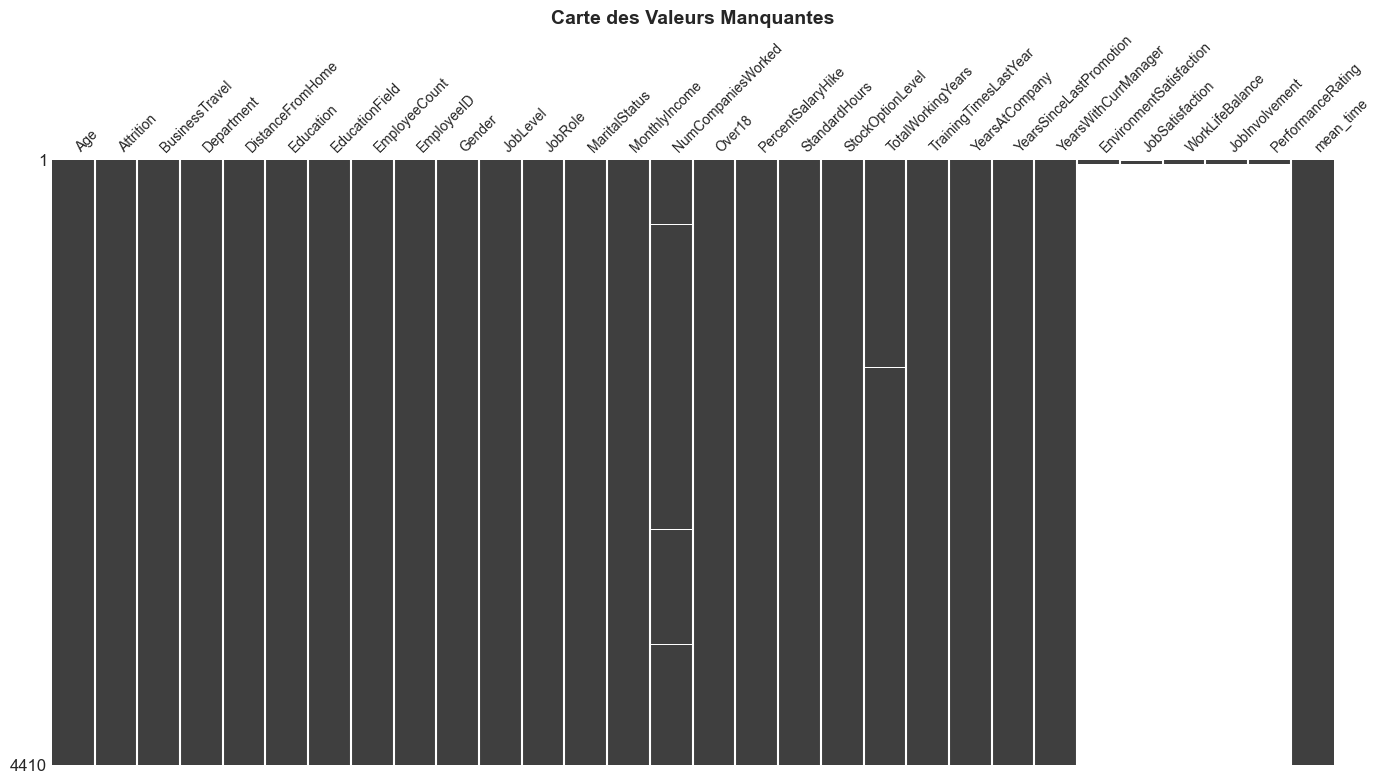

In [15]:
# Visualisation des valeurs manquantes avec missingno
try:
    import missingno as msno
    
    if df is not None:
        fig, ax = plt.subplots(figsize=(14, 8))
        msno.matrix(df, ax=ax, fontsize=10)
        plt.title('Carte des Valeurs Manquantes', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
except ImportError:
    print("missingno non disponible (installez avec: pip install missingno)")
except Exception as e:
    print(f"Erreur visualisation: {e}")

### Distribution de la Variable Cible


Distribution de l'Attrition :
Attrition
No     3699
Yes     711
Name: count, dtype: int64

Taux d'attrition: 16.1%


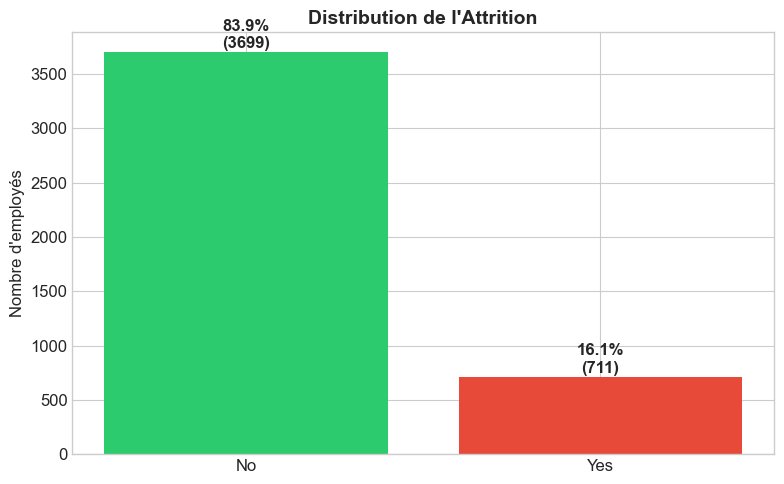

In [40]:
if df is not None and 'Attrition' in df.columns:
    print("\nDistribution de l'Attrition :")
    print(df['Attrition'].value_counts())
    print(f"\nTaux d'attrition: {(df['Attrition'] == 'Yes').mean() * 100:.1f}%")
    
    # Visualisation
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ["#2ccb6e", "#e84a39"]
    counts = df['Attrition'].value_counts()
    bars = ax.bar(counts.index, counts.values, color=colors)
    
    for bar, count in zip(bars, counts.values):
        pct = count / len(df) * 100
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{pct:.1f}%\n({count})', ha='center', va='bottom', fontweight='bold')
    
    ax.set_title('Distribution de l\'Attrition', fontsize=14, fontweight='bold')
    ax.set_ylabel('Nombre d\'employés')
    plt.tight_layout()
    plt.show()
else:
    print("Variable Attrition non disponible")
    print("   Ajoutez le fichier general_data.csv pour accéder à cette variable.")

### Analyse Détaillée de l'Attrition par Catégories

Visualisation de l'impact de chaque variable sur l'attrition avec des pourcentages.

Avant filtrage: 4410 lignes
Après filtrage NaN (complet): 35 lignes
  → 35 employés ont toutes les données complètes



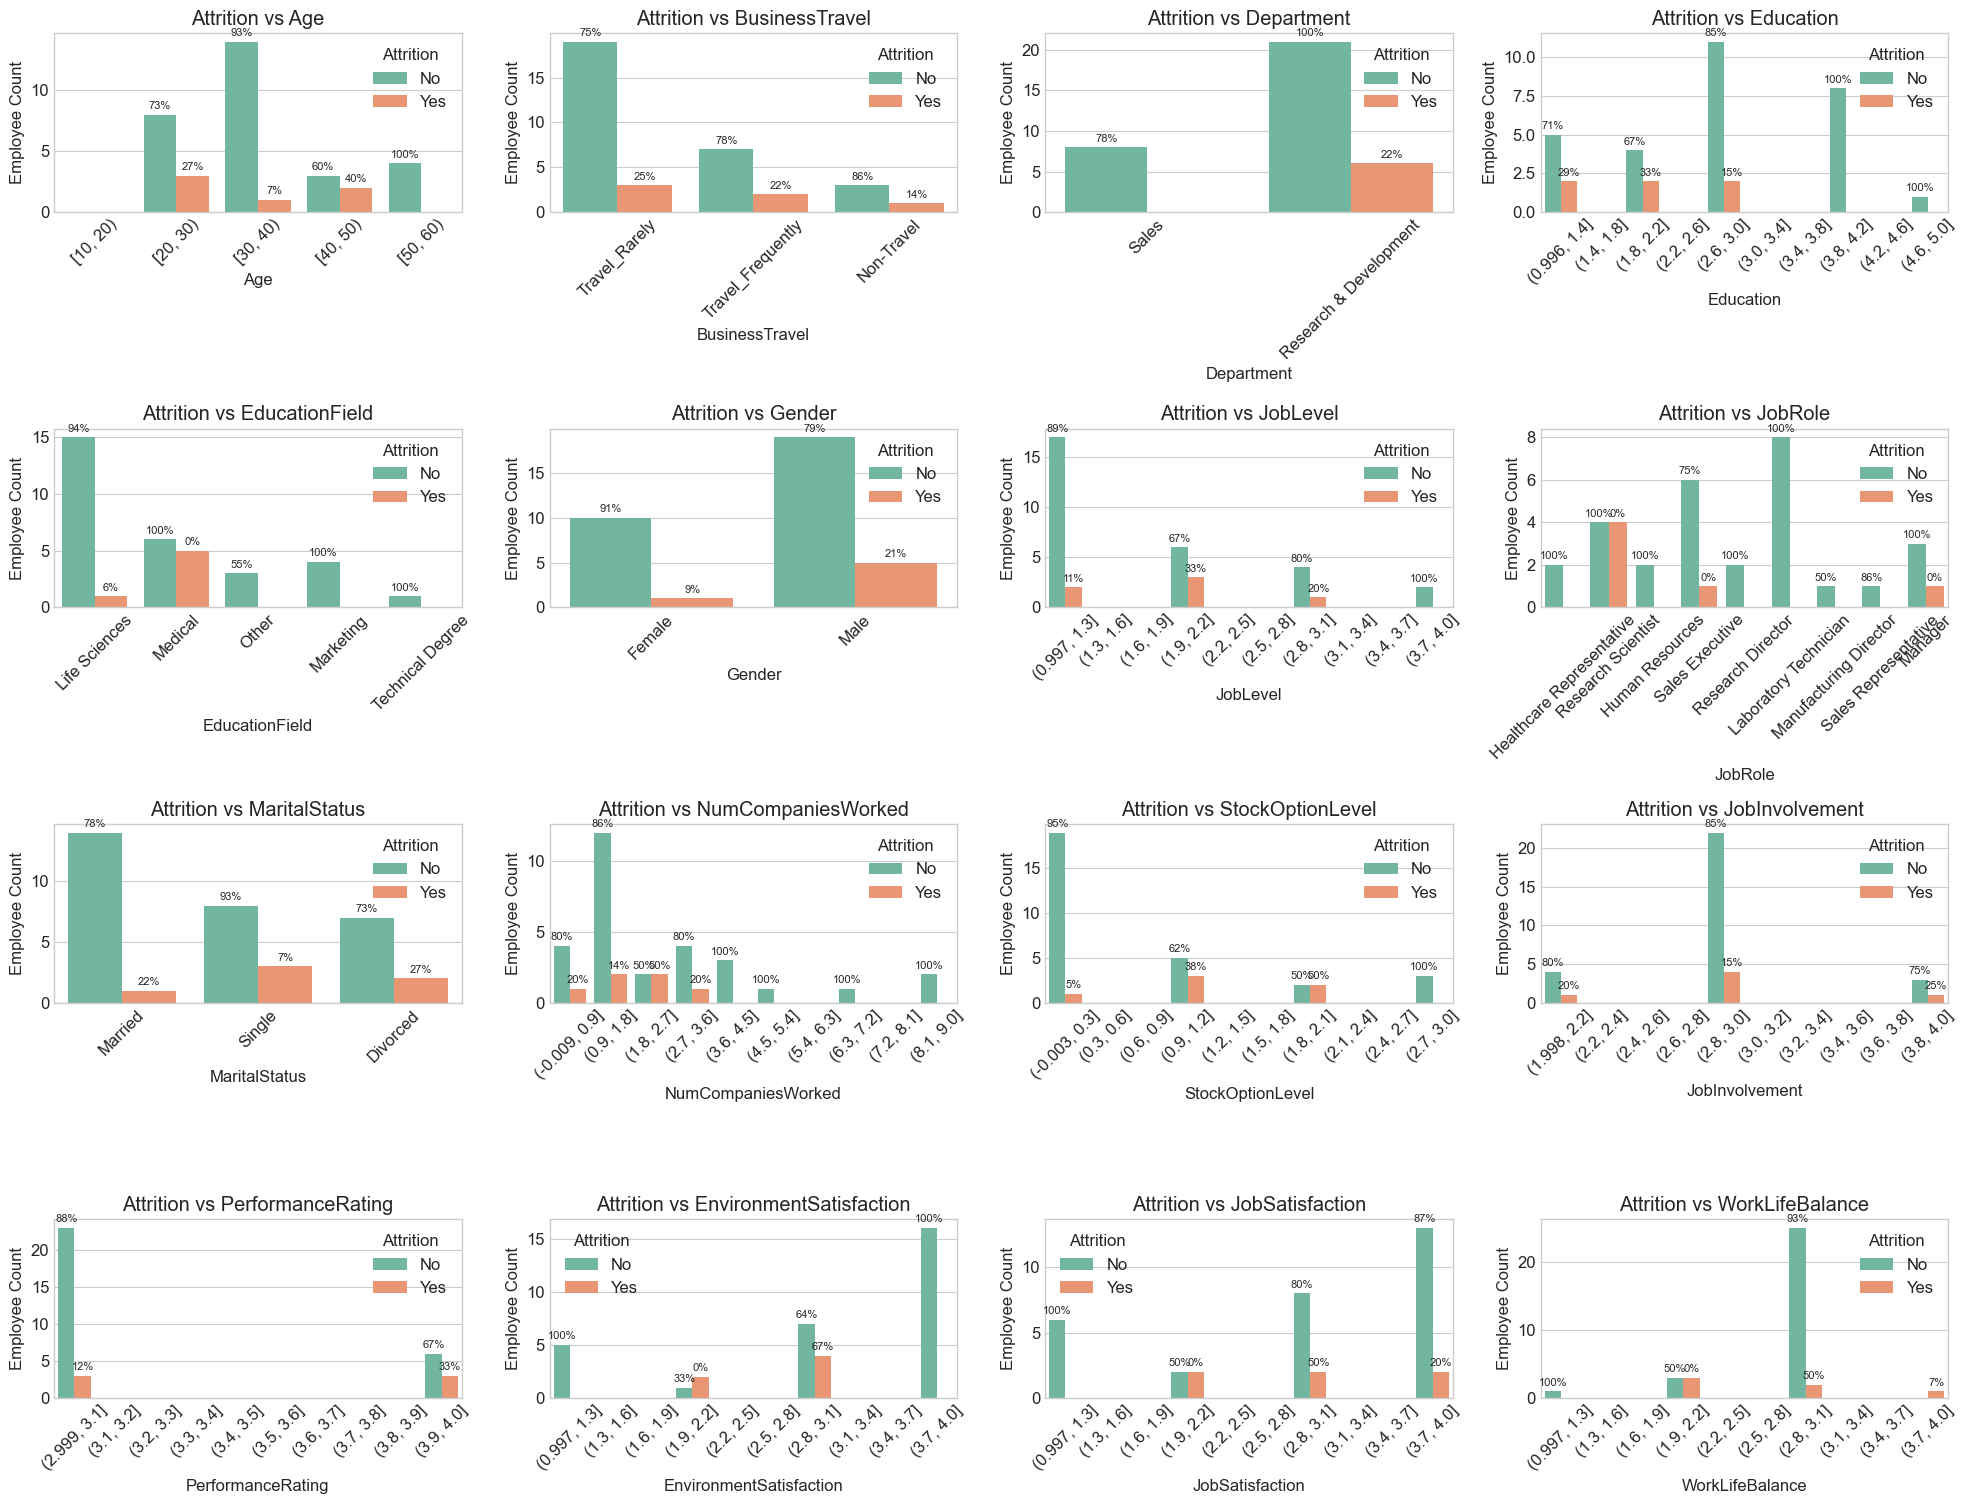


✓ Analyse catégorielle complétée


In [17]:
if df is not None and 'Attrition' in df.columns and FULL_DATASET:
    # Créer une copie pour l'EDA avec binning
    df_eda = df.copy()
    
    # IMPORTANT: Supprimer TOUTES les lignes avec NaN pour éviter les erreurs matplotlib
    print(f"Avant filtrage: {len(df_eda)} lignes")
    df_eda = df_eda.dropna()
    print(f"Après filtrage NaN (complet): {len(df_eda)} lignes")
    print(f"  → {len(df_eda)} employés ont toutes les données complètes\n")
    
    df_eda["Age"] = pd.cut(df_eda["Age"], range(10, 70, 10), right=False)
    
    # Fonction pour ajouter les pourcentages sur les graphiques
    def add_percent_labels(ax, ct, fontsize=8):
        containers = ax.containers
        if len(containers) < 2:
            return
        
        y_max = ax.get_ylim()[1]
        offset = 0.02 * y_max if y_max > 0 else 1
        
        for i, cat in enumerate(ct.index):
            total = ct.loc[cat].sum()
            if total == 0 or pd.isna(total):
                continue
            
            for j, hue in enumerate(ct.columns):
                if j >= len(containers) or i >= len(containers[j].patches):
                    continue
                bar = containers[j].patches[i]
                val = ct.loc[cat, hue]
                # Vérifier que les valeurs sont finies
                if pd.isna(val) or not np.isfinite(val):
                    continue
                pct = val / total
                if not np.isfinite(pct):
                    continue
                bar_height = bar.get_height()
                if not np.isfinite(bar_height):
                    continue
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar_height + offset,
                    f"{pct:.0%}",
                    ha="center",
                    va="bottom",
                    fontsize=fontsize
                )
    
    # Fonction générique pour créer les graphiques
    def make_plot(col, order=None, ax=None, bins=10, palette="Set2"):
        ax = ax or plt.gca()
        s = df_eda[col]
        
        # Variable numérique -> bins
        if pd.api.types.is_numeric_dtype(s):
            binned = pd.cut(s, bins=bins)
            tmp = df_eda.copy()
            tmp["_binned_"] = binned
            
            sns.countplot(
                x="_binned_", hue="Attrition", data=tmp,
                hue_order=["No", "Yes"],
                ax=ax, palette=palette
            )
            
            ct = pd.crosstab(tmp["_binned_"], tmp["Attrition"]).reindex(columns=["No","Yes"], fill_value=0)
            add_percent_labels(ax, ct)
            
            ax.set_xlabel(col)
            ax.tick_params(axis="x", rotation=45)
        
        # Variable catégorielle
        else:
            sns.countplot(
                x=col, hue="Attrition", data=df_eda,
                order=order, hue_order=["No", "Yes"],
                ax=ax, palette=palette
            )
            
            ct = pd.crosstab(df_eda[col], df_eda["Attrition"]).reindex(columns=["No","Yes"], fill_value=0)
            if order is not None:
                ct = ct.reindex(order).dropna(how="all")
            
            add_percent_labels(ax, ct)
            ax.tick_params(axis="x", rotation=45)
        
        ax.set_title(f"Attrition vs {col}")
        ax.set_ylabel("Employee Count")
        ax.legend(title="Attrition")
    
    # Variables à analyser
    cols = [
        "Age", "BusinessTravel", "Department", "Education", "EducationField", "Gender",
        "JobLevel", "JobRole", "MaritalStatus", "NumCompaniesWorked", "StockOptionLevel",
        "JobInvolvement", "PerformanceRating", "EnvironmentSatisfaction",
        "JobSatisfaction", "WorkLifeBalance"
    ]
    
    # Filtrer les colonnes disponibles
    cols = [c for c in cols if c in df_eda.columns]
    
    # Ordres spécifiques pour variables ordinales
    orders = {
        "Education": ["Below College", "College", "Bachelor", "Master", "Doctor"],
        "JobInvolvement": ["Low", "Medium", "High", "Very High"],
        "EnvironmentSatisfaction": ["Low", "Medium", "High", "Very High"],
        "JobSatisfaction": ["Low", "Medium", "High", "Very High"],
        "WorkLifeBalance": ["Bad", "Good", "Better", "Best"]
    }
    
    # Créer la grille de graphiques
    n_cols = 4
    n_rows = (len(cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3.8*n_rows))
    axes = axes.ravel()
    
    for i, col in enumerate(cols):
        make_plot(col, orders.get(col), ax=axes[i], bins=10)
    
    # Masquer les sous-graphiques inutilisés
    for i in range(len(cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Analyse catégorielle complétée")
else:
    print("Analyse détaillée nécessite le dataset complet avec Attrition")

### Distribution des Variables Numériques

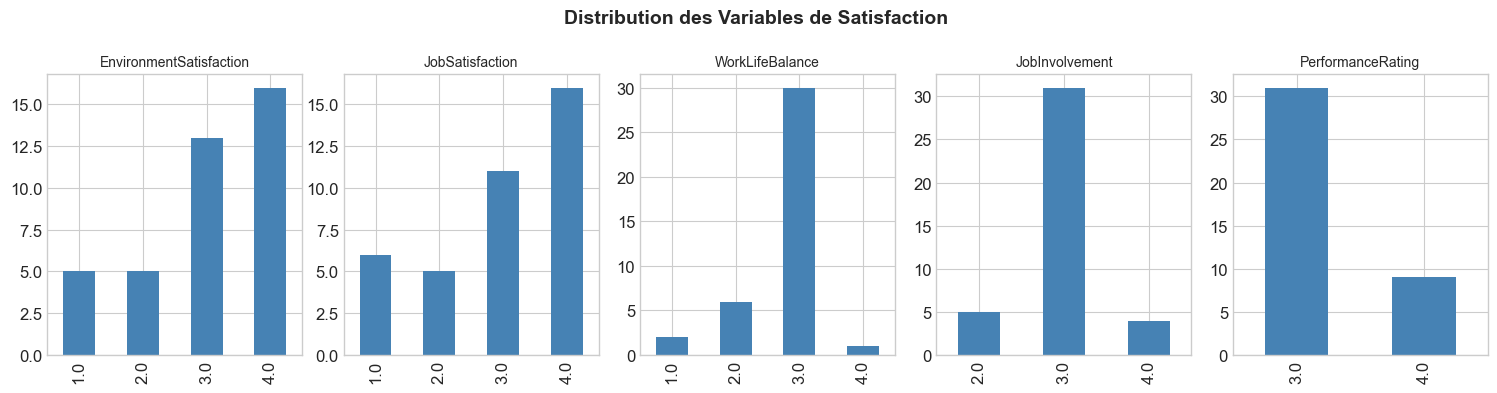

In [18]:
if df is not None:
    # Variables de satisfaction (surveys)
    survey_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 
                   'JobInvolvement', 'PerformanceRating']
    available_cols = [c for c in survey_cols if c in df.columns]
    
    if available_cols:
        fig, axes = plt.subplots(1, len(available_cols), figsize=(15, 4))
        if len(available_cols) == 1:
            axes = [axes]
        
        for ax, col in zip(axes, available_cols):
            df[col].value_counts().sort_index().plot(kind='bar', ax=ax, color='steelblue')
            ax.set_title(col, fontsize=10)
            ax.set_xlabel('')
        
        plt.suptitle('Distribution des Variables de Satisfaction', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

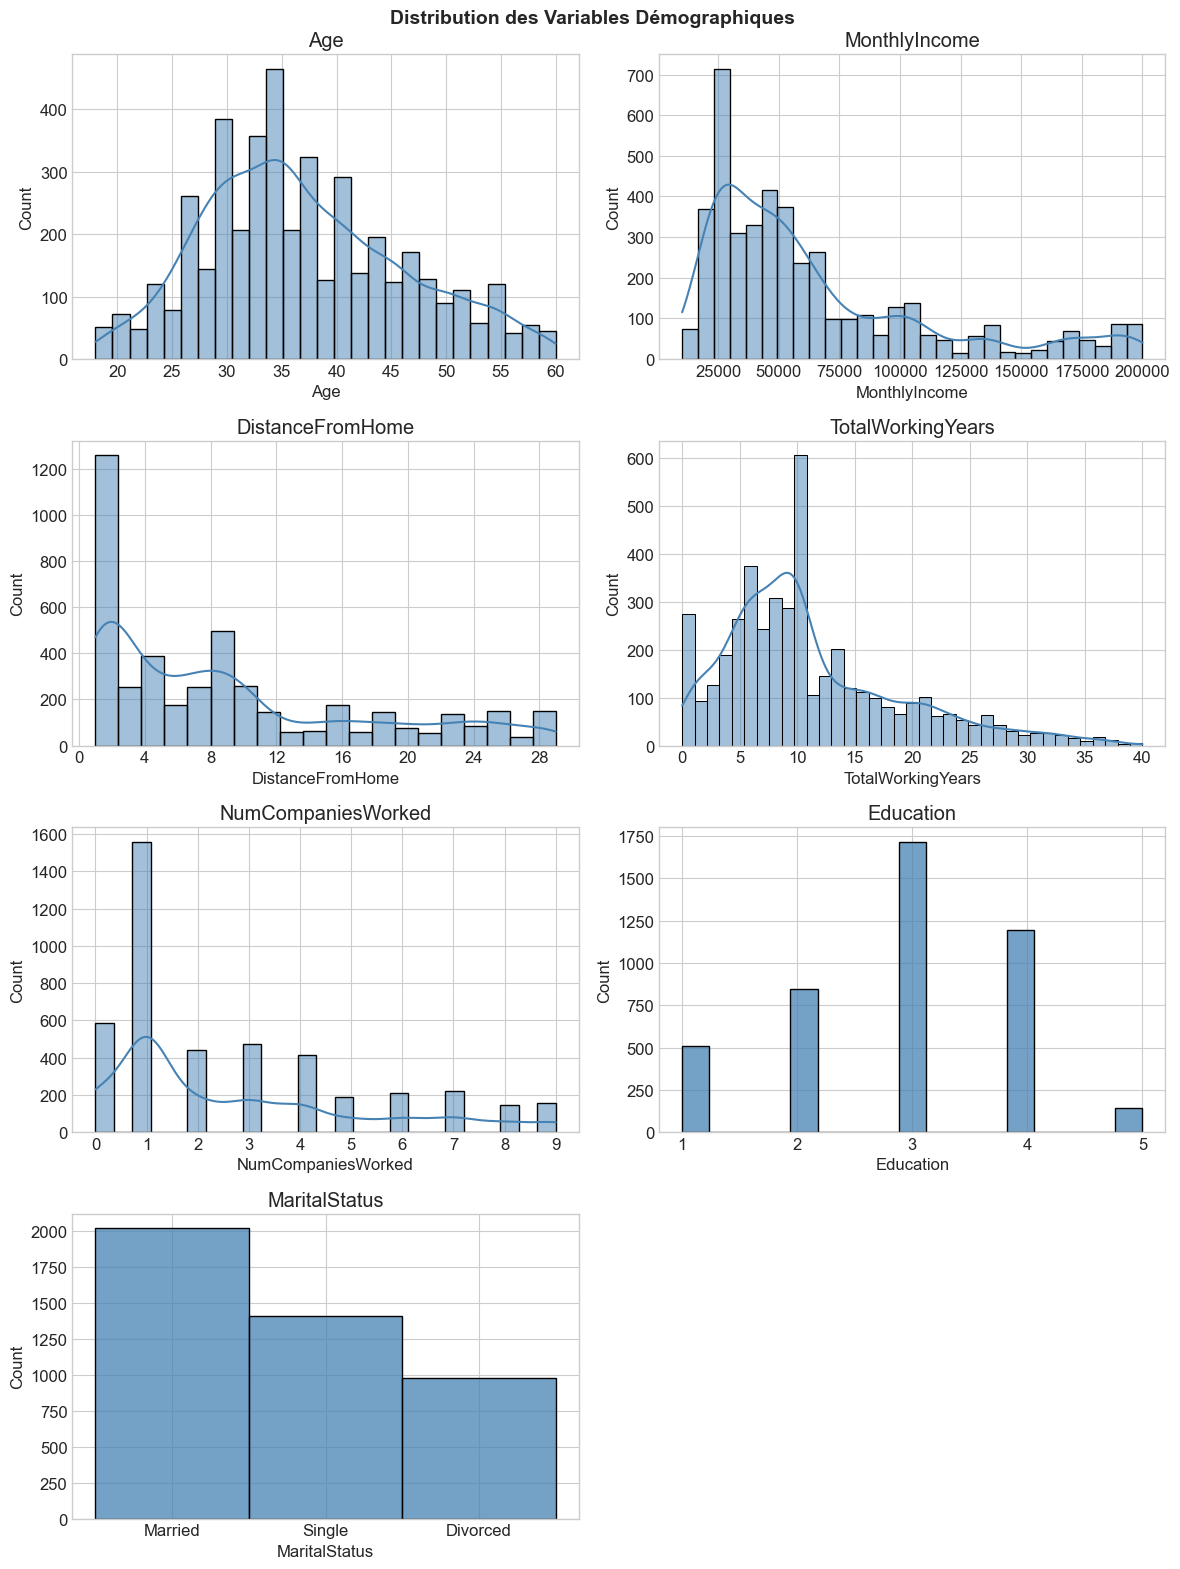

In [19]:
if df is not None and FULL_DATASET:
    # Variables démographiques
    demo_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked', 'Education', 'MaritalStatus']
    available_demo = [c for c in demo_cols if c in df.columns]
    
    if available_demo:
        n_vars = len(available_demo)
        n_cols = 2  # Nombre de colonnes dans la grille (fixe)
        n_rows = int((n_vars + n_cols - 1) // n_cols)  # Division entière arrondie vers le haut
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
        axes = axes.flatten()
        
        for i, col in enumerate(available_demo):
            # Pas de ligne KDE pour Education et MaritalStatus, mais oui pour les autres
            show_kde = (col != 'Education' and col != 'MaritalStatus')
            sns.histplot(df[col], ax=axes[i], kde=show_kde, color='steelblue')
            axes[i].set_title(col)
            # Forcer les valeurs entières sur l'axe x
            axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        
        # Cacher les axes vides
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)
        
        plt.suptitle('Distribution des Variables Démographiques', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

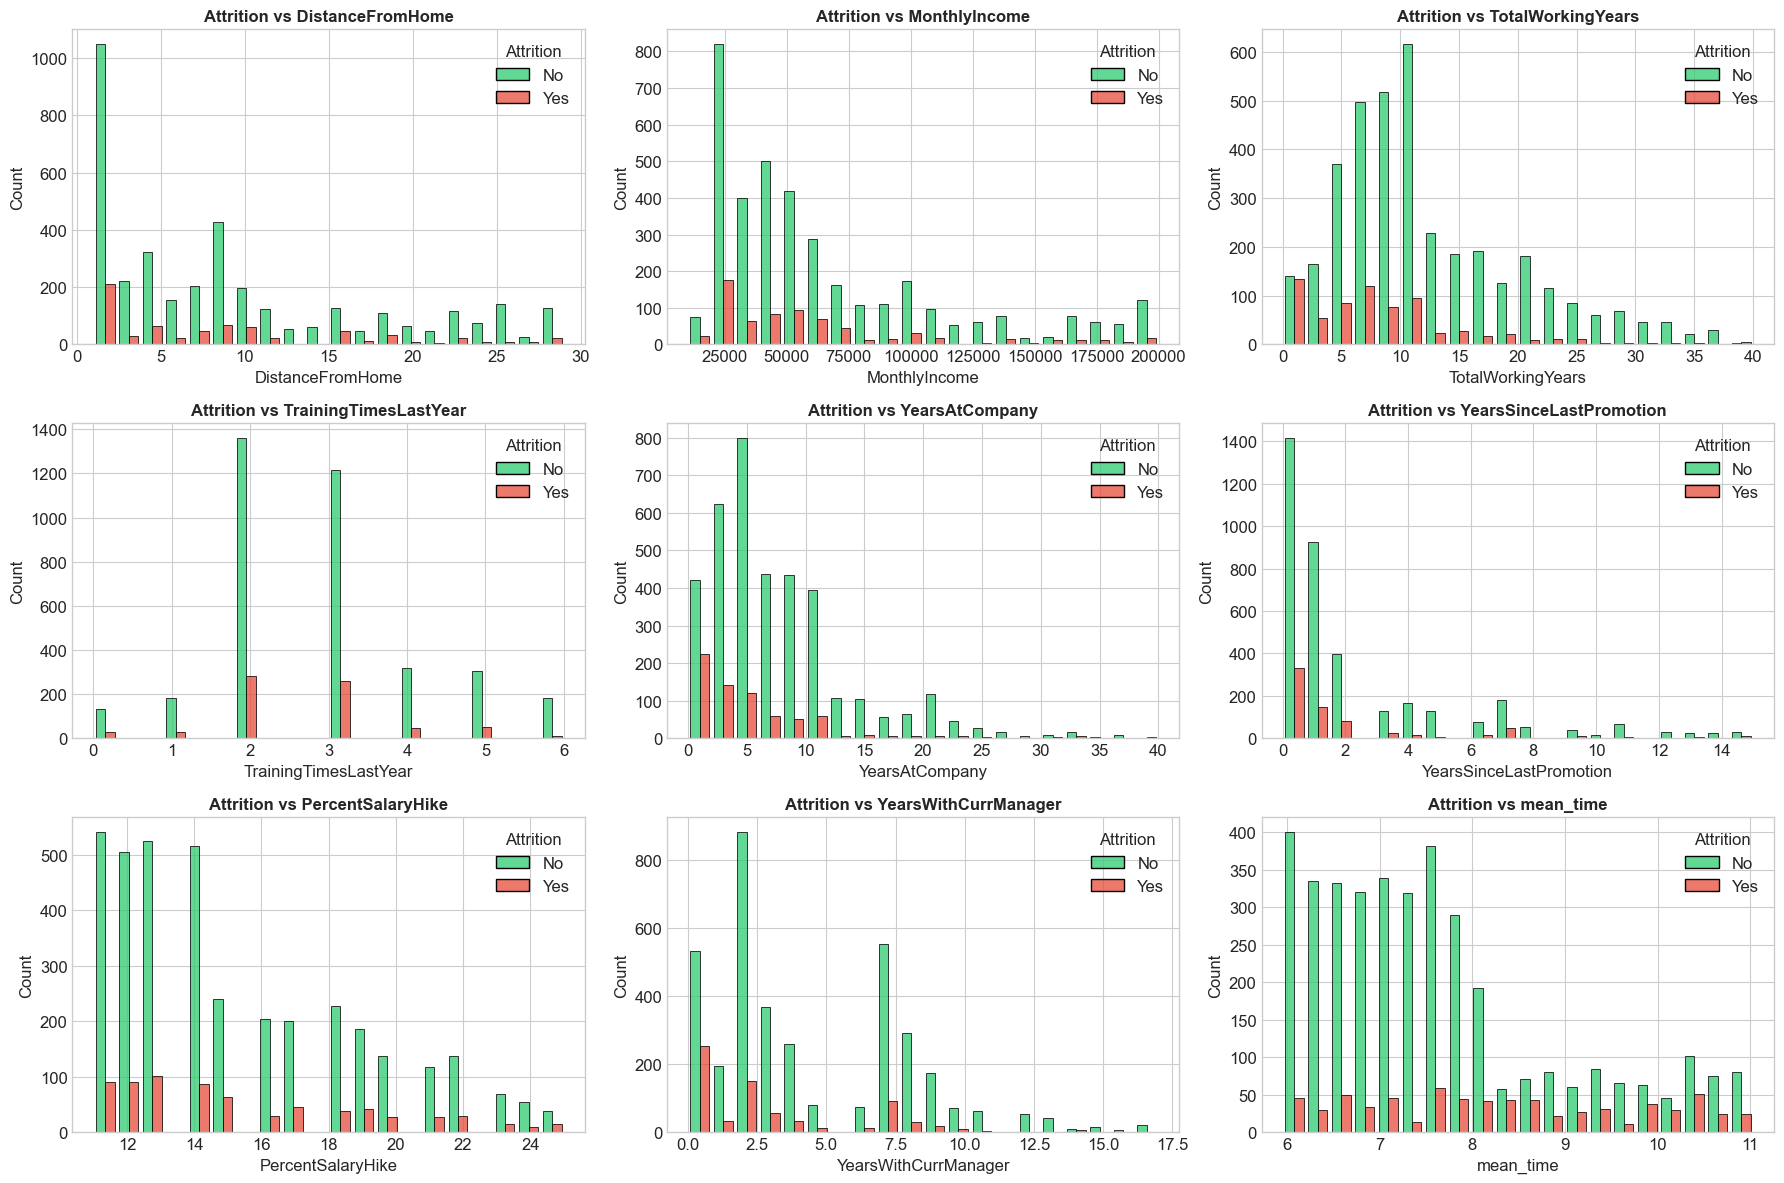


✓ Analyse de 9 variables continues complétée


In [20]:
# Analyse détaillée des variables continues avec histogrammes
if df is not None and 'Attrition' in df.columns and FULL_DATASET:
    continuous_features = [
        'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
        'PercentSalaryHike', 'YearsWithCurrManager'
    ]
    
    # Ajouter mean_time si disponible
    if 'mean_time' in df.columns:
        continuous_features.append('mean_time')
    
    # Filtrer les colonnes disponibles
    continuous_features = [c for c in continuous_features if c in df.columns]
    
    if continuous_features:
        n_features = len(continuous_features)
        n_cols = 3
        n_rows = (n_features + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
        axes = axes.ravel()
        
        for idx, feat in enumerate(continuous_features):
            ax = axes[idx]
            ax.set_title(f'Attrition vs {feat}', fontsize=12, fontweight='bold')
            
            # Histogrammes côte à côte pour Yes/No
            sns.histplot(
                data=df,
                x=feat,
                hue='Attrition',
                multiple='dodge',
                bins=20,
                shrink=0.8,
                ax=ax,
                palette=['#2ecc71', '#e74c3c']
            )
            
            ax.set_xlabel(feat)
            ax.set_ylabel('Count')
        
        # Masquer les sous-graphiques inutilisés
        for idx in range(n_features, len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✓ Analyse de {len(continuous_features)} variables continues complétée")

### Matrice de Corrélation

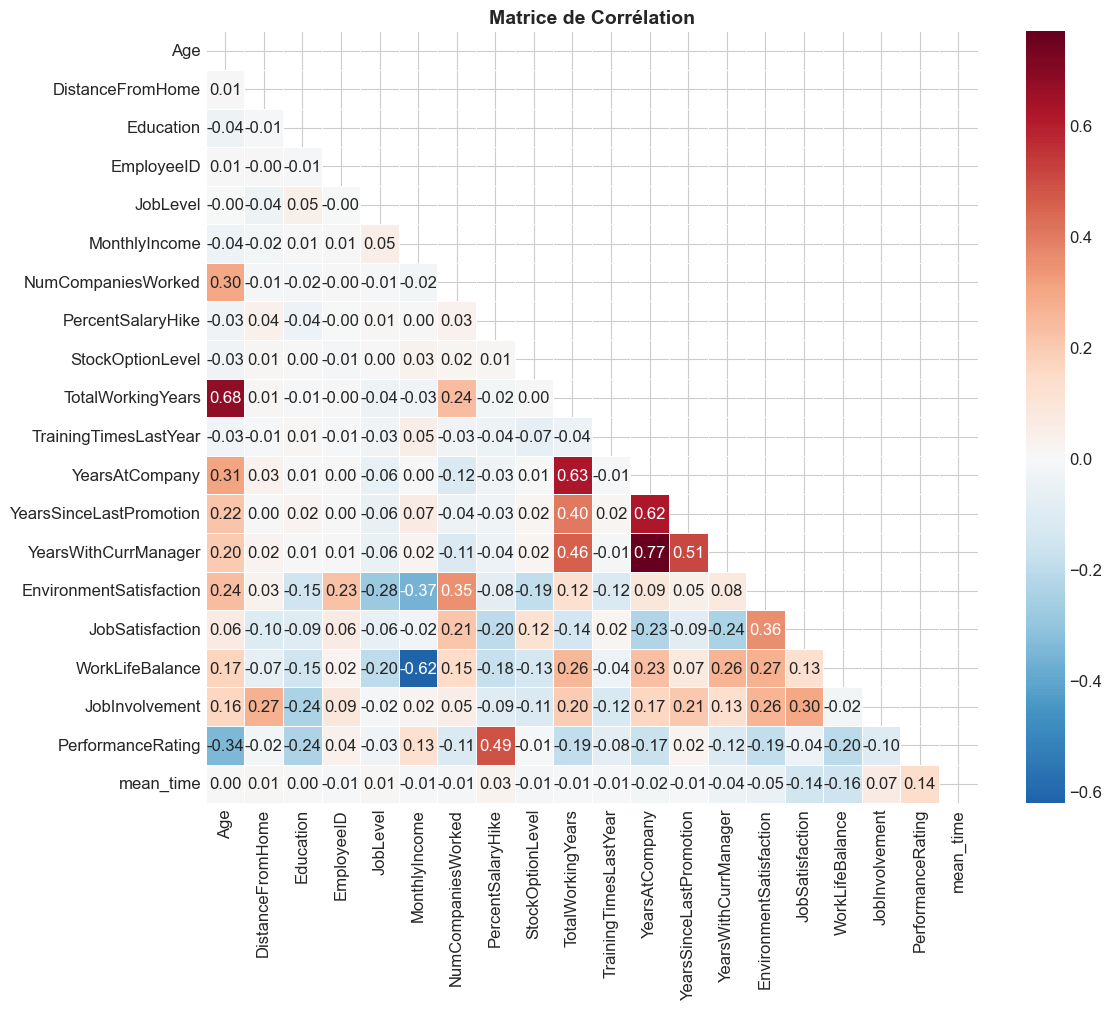

In [21]:
if df is not None:
    # Corrélation entre les variables numériques
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Supprimer les colonnes avec variance nulle ou toutes NaN
    numeric_df = numeric_df.loc[:, numeric_df.std() > 0]
    numeric_df = numeric_df.dropna(axis=1, how='all')
    
    if len(numeric_df.columns) > 1:
        plt.figure(figsize=(12, 10))
        corr = numeric_df.corr()
        
        # Supprimer les lignes/colonnes entièrement vides dans la matrice de corrélation
        corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')
        
        if not corr.empty:
            mask = np.triu(np.ones_like(corr, dtype=bool))
            
            sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                        center=0, square=True, linewidths=0.5)
            plt.title('Matrice de Corrélation', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
        else:
            print(" Pas de données valides pour la matrice de corrélation")
    else:
        print(" Pas assez de colonnes numériques pour calculer les corrélations")

### Insights EDA

**Observations clés basées sur l'analyse exploratoire:**

- **Taux d'attrition global**: ~16% des employés ont quitté l'entreprise
- **Départements à risque**: Les RH montrent un taux d'attrition de ~30%
- **Formation**: Les employés avec une formation en RH ont un taux d'attrition de 41%
- **Équilibre vie-travail**: 31% des employés partis avaient un mauvais équilibre
- **Démographie**: Les jeunes célibataires sont plus enclins à partir (24.5%)
- **Voyages**: Les employés voyageant fréquemment ont 25% d'attrition
- **Niveau hiérarchique**: Plus d'attrition aux niveaux inférieurs
- **Recherche**: Les directeurs et scientifiques de recherche montrent 21% d'attrition
- **Mobilité**: Les employés ayant travaillé dans 4+ entreprises partent plus
- **Satisfaction**: L'attrition diminue avec la satisfaction environnementale, professionnelle et l'implication
- **Durée de travail**: Les employés partis ont souvent travaillé plus longtemps (surcharge ou inadaptation)

---
## 4. Prétraitement des Données

In [22]:
if df is not None:
    df_processed = df.copy()
    
    # 1. Gestion des valeurs manquantes
    print("Traitement des valeurs manquantes...")
    
    for col in df_processed.select_dtypes(include=[np.number]).columns:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"  • {col}: valeurs manquantes remplacées par la médiane ({median_val})")
    
    for col in df_processed.select_dtypes(include=['object']).columns:
        if df_processed[col].isnull().sum() > 0:
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"  • {col}: valeurs manquantes remplacées par le mode ({mode_val})")
    
    print(f"\nValeurs manquantes restantes: {df_processed.isnull().sum().sum()}")

Traitement des valeurs manquantes...
  • NumCompaniesWorked: valeurs manquantes remplacées par la médiane (2.0)
  • TotalWorkingYears: valeurs manquantes remplacées par la médiane (10.0)
  • EnvironmentSatisfaction: valeurs manquantes remplacées par la médiane (3.0)
  • JobSatisfaction: valeurs manquantes remplacées par la médiane (3.0)
  • WorkLifeBalance: valeurs manquantes remplacées par la médiane (3.0)
  • JobInvolvement: valeurs manquantes remplacées par la médiane (3.0)
  • PerformanceRating: valeurs manquantes remplacées par la médiane (3.0)

Valeurs manquantes restantes: 0


In [23]:
if df is not None and 'Attrition' in df_processed.columns:
    # 2. Encodage de la variable cible
    print("\nEncodage de la variable cible...")
    
    if df_processed['Attrition'].dtype == 'object':
        df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})
        print(f"  • Attrition encodée: Yes=1, No=0")
    
    print(f"\n Distribution après encodage:")
    print(df_processed['Attrition'].value_counts())


Encodage de la variable cible...
  • Attrition encodée: Yes=1, No=0

 Distribution après encodage:
Attrition
0    3699
1     711
Name: count, dtype: int64


In [24]:
if df is not None:
    # 3. Encodage des variables catégorielles
    print("\nEncodage des variables catégorielles...")
    
    categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
    # Exclure les colonnes d'ID
    categorical_cols = [c for c in categorical_cols if 'ID' not in c.upper()]
    
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        encoders[col] = le
        print(f"  • {col}: {len(le.classes_)} classes encodées")
    
    print(f"\n{len(categorical_cols)} colonnes catégorielles encodées")


Encodage des variables catégorielles...
  • BusinessTravel: 3 classes encodées
  • Department: 3 classes encodées
  • EducationField: 6 classes encodées
  • Gender: 2 classes encodées
  • JobRole: 9 classes encodées
  • MaritalStatus: 3 classes encodées
  • Over18: 1 classes encodées

7 colonnes catégorielles encodées


---
## 5. Feature Engineering

In [25]:
if df is not None and FULL_DATASET:
    print("Création de features dérivées...")
    
    new_features = []
    
    # Ratio ancienneté
    if 'YearsAtCompany' in df_processed.columns and 'TotalWorkingYears' in df_processed.columns:
        df_processed['TenureRatio'] = df_processed['YearsAtCompany'] / (df_processed['TotalWorkingYears'] + 1)
        new_features.append('TenureRatio')
    
    # Stagnation de promotion
    if 'YearsSinceLastPromotion' in df_processed.columns and 'YearsAtCompany' in df_processed.columns:
        df_processed['PromotionStagnation'] = df_processed['YearsSinceLastPromotion'] / (df_processed['YearsAtCompany'] + 1)
        new_features.append('PromotionStagnation')
    
    # Score de satisfaction globale
    satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
    available_sat = [c for c in satisfaction_cols if c in df_processed.columns]
    if available_sat:
        df_processed['OverallSatisfaction'] = df_processed[available_sat].mean(axis=1)
        new_features.append('OverallSatisfaction')
    
    # Revenu par année d'expérience
    if 'MonthlyIncome' in df_processed.columns and 'TotalWorkingYears' in df_processed.columns:
        df_processed['IncomePerYear'] = df_processed['MonthlyIncome'] / (df_processed['TotalWorkingYears'] + 1)
        new_features.append('IncomePerYear')
    
    print(f"\n{len(new_features)} nouvelles features créées:")
    for f in new_features:
        print(f"  • {f}")
else:
    print("Feature engineering limité sans le dataset complet")

Création de features dérivées...

4 nouvelles features créées:
  • TenureRatio
  • PromotionStagnation
  • OverallSatisfaction
  • IncomePerYear


---
## 6. Préparation des Données pour le Modèle

### Screening Rapide des Modèles avec LazyPredict

Exploration rapide de nombreux algorithmes pour identifier les plus prometteurs.

In [26]:
# LazyPredict - Screening rapide (OPTIONNEL)
# Note: LazyPredict peut avoir des conflits de dépendances avec Anaconda
# Si cette cellule échoue, passez simplement à la cellule suivante

LAZYPREDICT_OK = False

try:
    if 'X_train' in globals() and 'y_train' in globals():
        from lazypredict.Supervised import LazyClassifier
        import lazypredict.Supervised as lps
        import tqdm
        from scipy import sparse
        import io
        import contextlib
        
        lps.notebook_tqdm = tqdm.tqdm
        
        print("Screening LazyPredict en cours...")
        print("Note: Ceci prend quelques minutes...\n")
        
        X_tr, X_val, y_tr, y_val = train_test_split(
            X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
        )
        
        from sklearn.compose import ColumnTransformer
        from sklearn.preprocessing import StandardScaler, OneHotEncoder
        from sklearn.impute import SimpleImputer
        from sklearn.pipeline import Pipeline
        
        num_cols = X_tr.select_dtypes(include=[np.number]).columns.tolist()
        cat_cols = X_tr.select_dtypes(include=['object', 'category']).columns.tolist()
        
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, num_cols),
                ('cat', categorical_transformer, cat_cols),
            ],
            remainder='drop'
        )
        
        X_tr_p = preprocessor.fit_transform(X_tr)
        X_val_p = preprocessor.transform(X_val)
        
        if sparse.issparse(X_tr_p):
            X_tr_p = X_tr_p.toarray()
            X_val_p = X_val_p.toarray()
        
        buf = io.StringIO()
        lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, predictions=True)
        
        with contextlib.redirect_stdout(buf), contextlib.redirect_stderr(buf):
            lazy_models, lazy_predictions = lazy_clf.fit(X_tr_p, X_val_p, y_tr, y_val)
        
        print("=" * 60)
        print("TOP 15 MODÈLES (triés par F1 Score)")
        print("=" * 60)
        
        top15 = lazy_models.sort_values('F1 Score', ascending=False).head(15)
        display(top15.round(4))
        
        print("\n✓ Screening LazyPredict complété")
        LAZYPREDICT_OK = True
        
    else:
        print("⚠ LazyPredict: Exécutez d'abord la cellule de préparation train/test")
        print("   Passez à la cellule suivante pour continuer sans LazyPredict")
        
except Exception as e:
    print(f"⚠ LazyPredict non disponible: {str(e)[:100]}...")
    print("\n→ Ce n'est pas grave ! LazyPredict est optionnel.")
    print("→ Passez à la cellule suivante pour entraîner les 10 modèles principaux.")

⚠ LazyPredict: Exécutez d'abord la cellule de préparation train/test
   Passez à la cellule suivante pour continuer sans LazyPredict


In [27]:
if df is not None and 'Attrition' in df_processed.columns:
    print("Préparation train/test split...")
    
    # Séparer features et target
    cols_to_drop = ['Attrition']
    if 'EmployeeID' in df_processed.columns:
        cols_to_drop.append('EmployeeID')
    if 'EmployeeId' in df_processed.columns:
        cols_to_drop.append('EmployeeId')
    
    X = df_processed.drop(columns=cols_to_drop)
    y = df_processed['Attrition']
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"\nSplit effectué:")
    print(f"  • Train: {len(X_train)} échantillons ({len(X_train)/len(X)*100:.0f}%)")
    print(f"  • Test: {len(X_test)} échantillons ({len(X_test)/len(X)*100:.0f}%)")
    print(f"\n  Taux d'attrition (train): {y_train.mean()*100:.1f}%")
    print(f"  Taux d'attrition (test): {y_test.mean()*100:.1f}%")
    
    # Normalisation
    print("\nNormalisation des features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("  Features normalisées (StandardScaler)")
    
    DATA_READY = True
else:
    print("Impossible de préparer les données sans la variable cible (Attrition)")
    print("   Ajoutez le fichier general_data.csv pour continuer.")
    DATA_READY = False

Préparation train/test split...

Split effectué:
  • Train: 3528 échantillons (80%)
  • Test: 882 échantillons (20%)

  Taux d'attrition (train): 16.1%
  Taux d'attrition (test): 16.1%

Normalisation des features...
  Features normalisées (StandardScaler)


---
## 7. Entraînement et Évaluation des Modèles

### Modèles utilisés :
1. **Logistic Regression** - Modèle de base, interprétable
2. **Random Forest** - Ensemble de décision, robuste
3. **Gradient Boosting** - Boosting classique sklearn
4. **XGBoost** - Gradient boosting optimisé, performant
5. **LightGBM** - Gradient boosting rapide (Microsoft)
6. **SVM** - Support Vector Machine, efficace en haute dimension
7. **KNN** - K plus proches voisins, simple et intuitif
8. **Decision Tree** - Arbre de décision, très interprétable
9. **Naive Bayes** - Modèle probabiliste, rapide
10. **AdaBoost** - Boosting adaptatif

In [28]:
if DATA_READY:
    print("Entraînement des modèles...\n")
    
    # Définir les modèles
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(random_state=42, class_weight='balanced', probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
        'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10),
        'Naive Bayes': GaussianNB(),
        'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
    }
    
    if XGBOOST_AVAILABLE:
        models['XGBoost'] = XGBClassifier(
            random_state=42, use_label_encoder=False, 
            eval_metric='logloss', scale_pos_weight=5
        )
    
    if LIGHTGBM_AVAILABLE:
        models['LightGBM'] = LGBMClassifier(
            random_state=42, class_weight='balanced',
            verbose=-1, n_estimators=100
        )
    
    # Entraîner et évaluer
    results = []
    trained_models = {}
    
    for name, model in models.items():
        print(f"{name}")
        print("-" * 40)
        
        # Entraînement
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model
        
        # Prédictions
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        # Métriques
        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1-Score': f1_score(y_test, y_pred, zero_division=0),
            'AUC-ROC': roc_auc_score(y_test, y_proba)
        }
        results.append(metrics)
        
        print(f"  Accuracy:  {metrics['Accuracy']:.4f}")
        print(f"  Precision: {metrics['Precision']:.4f}")
        print(f"  Recall:    {metrics['Recall']:.4f}")
        print(f"  F1-Score:  {metrics['F1-Score']:.4f}")
        print(f"  AUC-ROC:   {metrics['AUC-ROC']:.4f}")
        print()
    
    # Créer le DataFrame des résultats
    results_df = pd.DataFrame(results).set_index('Model')
    results_df = results_df.sort_values('F1-Score', ascending=False)
    
    print("\n" + "=" * 60)
    print(f"COMPARAISON DES {len(trained_models)} MODÈLES (trié par F1-Score)")
    print("=" * 60)
    display(results_df.round(4))

Entraînement des modèles...

Logistic Regression
----------------------------------------
  Accuracy:  0.6871
  Precision: 0.2796
  Recall:    0.5986
  F1-Score:  0.3812
  AUC-ROC:   0.7510

Random Forest
----------------------------------------
  Accuracy:  0.9955
  Precision: 1.0000
  Recall:    0.9718
  F1-Score:  0.9857
  AUC-ROC:   0.9995

Gradient Boosting
----------------------------------------
  Accuracy:  0.8821
  Precision: 0.7879
  Recall:    0.3662
  F1-Score:  0.5000
  AUC-ROC:   0.9009

SVM
----------------------------------------
  Accuracy:  0.8821
  Precision: 0.5979
  Recall:    0.8169
  F1-Score:  0.6905
  AUC-ROC:   0.9320

KNN
----------------------------------------
  Accuracy:  0.8050
  Precision: 0.3558
  Recall:    0.2606
  F1-Score:  0.3008
  AUC-ROC:   0.8738

Decision Tree
----------------------------------------
  Accuracy:  0.8810
  Precision: 0.5860
  Recall:    0.8873
  F1-Score:  0.7059
  AUC-ROC:   0.9552

Naive Bayes
---------------------------------

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Model,,,,,
XGBoost,0.9966,1.0000,0.9789,0.9893,0.9911
Random Forest,0.9955,1.0000,0.9718,0.9857,0.9995
LightGBM,0.9921,0.9720,0.9789,0.9754,0.9958
Decision Tree,0.8810,0.5860,0.8873,0.7059,0.9552
SVM,0.8821,0.5979,0.8169,0.6905,0.9320
Gradient Boosting,0.8821,0.7879,0.3662,0.5000,0.9009
Logistic Regression,0.6871,0.2796,0.5986,0.3812,0.7510
KNN,0.8050,0.3558,0.2606,0.3008,0.8738
Naive Bayes,0.8152,0.3846,0.2465,0.3004,0.6958


### Explications Mathématiques des Modèles

Comprendre les fondements mathématiques des algorithmes utilisés.

#### 1) Régression Logistique (Logistic Regression)

La régression logistique modélise la probabilité d'appartenir à la classe 1 via une **fonction sigmoïde** :

$$
p(y=1\mid x)=\sigma(w^\top x + b)=\frac{1}{1+e^{-(w^\top x+b)}}
$$

**Règle de décision** (seuil 0.5) :

$$
\hat y = \mathbb{1}[p \ge 0.5]
$$

**Apprentissage** : Minimisation de la *log-loss* avec régularisation L2 :

$$
\min_{w,b}\; \sum_{i=1}^n \Big(-y_i\log p_i-(1-y_i)\log(1-p_i)\Big) + \lambda \|w\|_2^2
$$

**Interprétation** (*log-odds*) :

$$
\log\frac{p}{1-p}=w^\top x+b
$$

**Avantages** : Rapide, interprétable, probabilités calibrées  
**Limites** : Linéaire, peut sous-performer sur données complexes

---

#### 2) SVM Linéaire (LinearSVC)

Le SVM cherche un hyperplan $w^\top x + b=0$ avec **marge maximale**.  
Avec $y_i\in\{-1,+1\}$, formulation soft-margin :

$$
\min_{w,b}\; \frac{1}{2}\|w\|^2 + C\sum_{i=1}^n \max(0, 1 - y_i(w^\top x_i + b))
$$

- $\max(0,1-\cdot)$ = **hinge loss** (pénalise les erreurs et marges étroites)
- $\|w\|^2$ favorise une grande marge
- $C$ : compromis régularisation/erreur

**Décision** :

$$
\hat y = \mathrm{sign}(w^\top x + b)
$$

**Avantages** : Efficace en haute dimension, robuste  
**Limites** : Moins performant sur données non-linéaires (sans kernel)

---

#### 3) Random Forest

Ensemble de $T$ arbres de décision. Critère de division : **impureté de Gini** :

$$
Gini(S)=1-\sum_k p_k^2
$$

où $p_k$ = proportion de la classe $k$ dans le nœud $S$.

**Prédiction** par vote majoritaire :

$$
\hat y = \mathrm{mode}\{\hat y^{(1)},\dots,\hat y^{(T)}\}
$$

**Avantages** : 
- Gère les interactions non-linéaires
- Robuste au bruit
- Pas besoin de normalisation
- Fournit l'importance des features

**Limites** : 
- Moins interprétable
- Peut overfitter avec des arbres trop profonds

---

#### 4) XGBoost (Gradient Boosting)

Modèle additif séquentiel :

$$
\hat y(x)=\sum_{t=1}^{T} f_t(x), \quad f_t \in \text{arbres}
$$

**Objectif** à minimiser :

$$
\mathcal{L}=\sum_{i} \ell(y_i,\hat y_i) + \sum_{t}\Omega(f_t)
$$

où $\ell$ = fonction de perte (log-loss), $\Omega$ = régularisation (profondeur, nb feuilles).

**Mise à jour itérative** :

$$
\hat y^{(t)} = \hat y^{(t-1)} + \eta f_t(x)
$$

avec $\eta$ = learning rate.

**Avantages** : 
- Très performant (état de l'art sur données tabulaires)
- Gère le déséquilibre via `scale_pos_weight`
- Parallélisation efficace

**Limites** : 
- Sensible aux hyperparamètres
- Plus lent à entraîner
- Risque d'overfitting si mal configuré

---

### Choix du Modèle

Le choix dépend du compromis entre :
- **Interprétabilité** → Logistic Regression
- **Performance** → Random Forest, XGBoost
- **Vitesse** → Logistic Regression, SVM
- **Robustesse** → Random Forest

Pour ce projet d'attrition, on privilégie un modèle équilibrant **performance** et **interprétabilité** pour faciliter les recommandations RH.

### Validation Croisée

In [29]:
if DATA_READY:
    print("\nValidation croisée (5-fold) pour tous les modèles...\n")
    
    cv_results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for name, model in models.items():
        scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='f1')
        cv_results.append({
            'Model': name,
            'CV Mean F1': scores.mean(),
            'CV Std F1': scores.std()
        })
        print(f"{name}: F1 = {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    cv_df = pd.DataFrame(cv_results).set_index('Model')
    cv_df = cv_df.sort_values('CV Mean F1', ascending=False)
    print(f"\n{'=' * 60}")
    print(f"VALIDATION CROISÉE - {len(models)} MODÈLES")
    print(f"{'=' * 60}")
    display(cv_df.round(4))


Validation croisée (5-fold) pour tous les modèles...

Logistic Regression: F1 = 0.4229 (+/- 0.0281)
Random Forest: F1 = 0.9281 (+/- 0.0138)
Gradient Boosting: F1 = 0.5693 (+/- 0.0539)
SVM: F1 = 0.6260 (+/- 0.0373)
KNN: F1 = 0.3596 (+/- 0.0334)
Decision Tree: F1 = 0.7135 (+/- 0.0421)
Naive Bayes: F1 = 0.2915 (+/- 0.0695)
AdaBoost: F1 = 0.3828 (+/- 0.0627)
XGBoost: F1 = 0.9323 (+/- 0.0151)
LightGBM: F1 = 0.9206 (+/- 0.0243)

VALIDATION CROISÉE - 10 MODÈLES


,CV Mean F1,CV Std F1
Model,,
XGBoost,0.9323,0.0151
Random Forest,0.9281,0.0138
LightGBM,0.9206,0.0243
Decision Tree,0.7135,0.0421
SVM,0.6260,0.0373
Gradient Boosting,0.5693,0.0539
Logistic Regression,0.4229,0.0281
AdaBoost,0.3828,0.0627
KNN,0.3596,0.0334


---
## 8. Visualisation des Performances

### Comparaison des Métriques

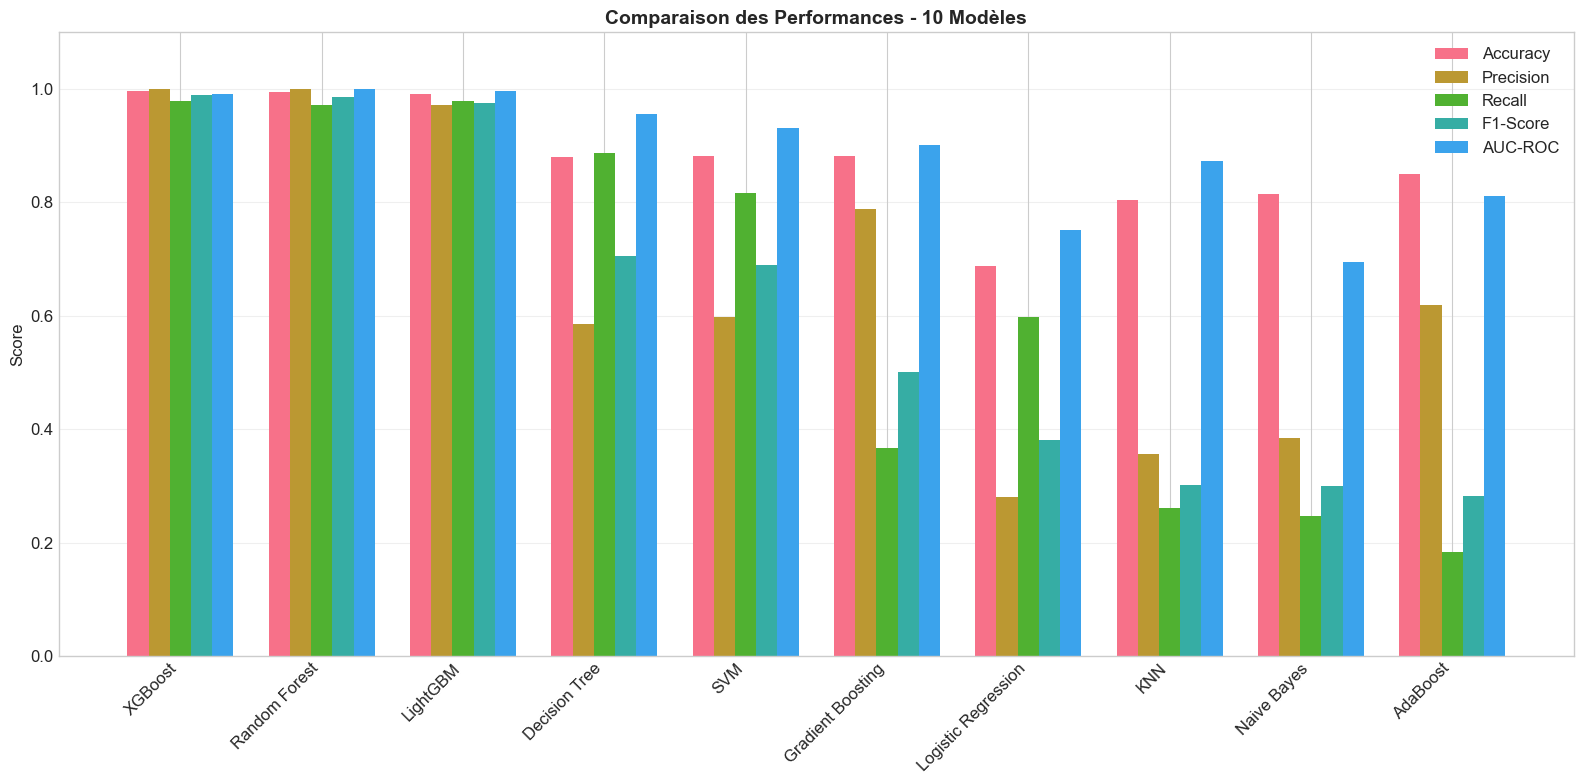

In [30]:
if DATA_READY:
    # Graphique de comparaison
    fig, ax = plt.subplots(figsize=(16, 8))
    
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
    x = np.arange(len(results_df))
    width = 0.15
    
    for i, metric in enumerate(metrics_to_plot):
        offset = (i - len(metrics_to_plot)/2 + 0.5) * width
        bars = ax.bar(x + offset, results_df[metric], width, label=metric)
    
    ax.set_ylabel('Score')
    ax.set_title(f'Comparaison des Performances - {len(results_df)} Modèles', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(results_df.index, rotation=45, ha='right')
    ax.legend(loc='upper right')
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Graphiques Comparatifs Additionnels

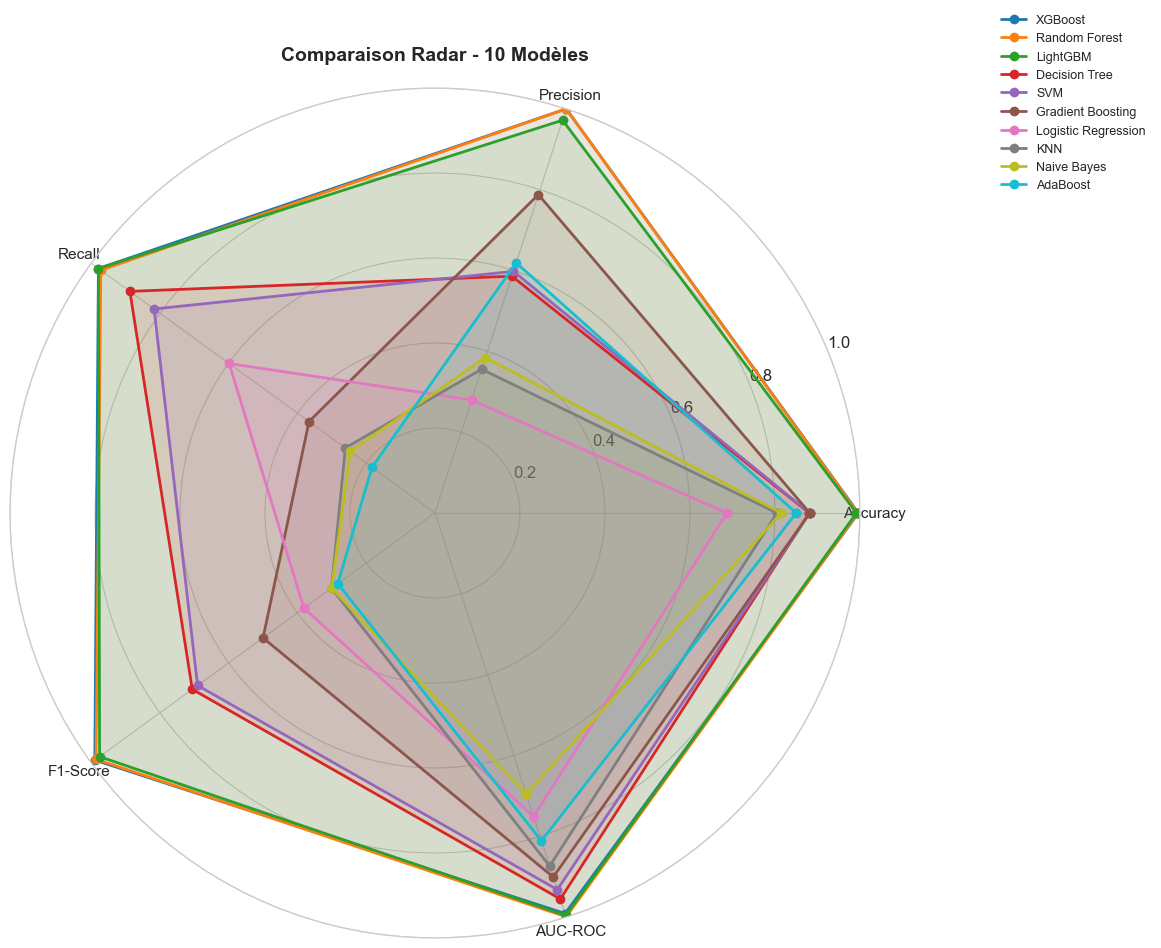

In [31]:
# Graphique en radar pour comparer les modèles
try:
    if 'results_df' in globals() and results_df is not None:
        from math import pi
        
        # Préparer les données pour le radar
        categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
        N = len(categories)
        
        # Angles pour chaque axe
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        
        # Créer le subplot - taille adaptée au nombre de modèles
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
        
        # Couleurs distinctes pour chaque modèle
        colors = plt.cm.tab10(np.linspace(0, 1, len(results_df)))
        
        for idx, (model_name, row) in enumerate(results_df.iterrows()):
            values = row[categories].tolist()
            values += values[:1]
            
            ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[idx])
            ax.fill(angles, values, alpha=0.1, color=colors[idx])
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, size=11)
        ax.set_ylim(0, 1)
        ax.set_title(f'Comparaison Radar - {len(results_df)} Modèles', size=14, fontweight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1), fontsize=9)
        ax.grid(True)
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠ Graphique radar: Exécutez d'abord les cellules d'entraînement des modèles (section 7)")
except Exception as e:
    print(f"⚠ Erreur graphique radar: {e}")

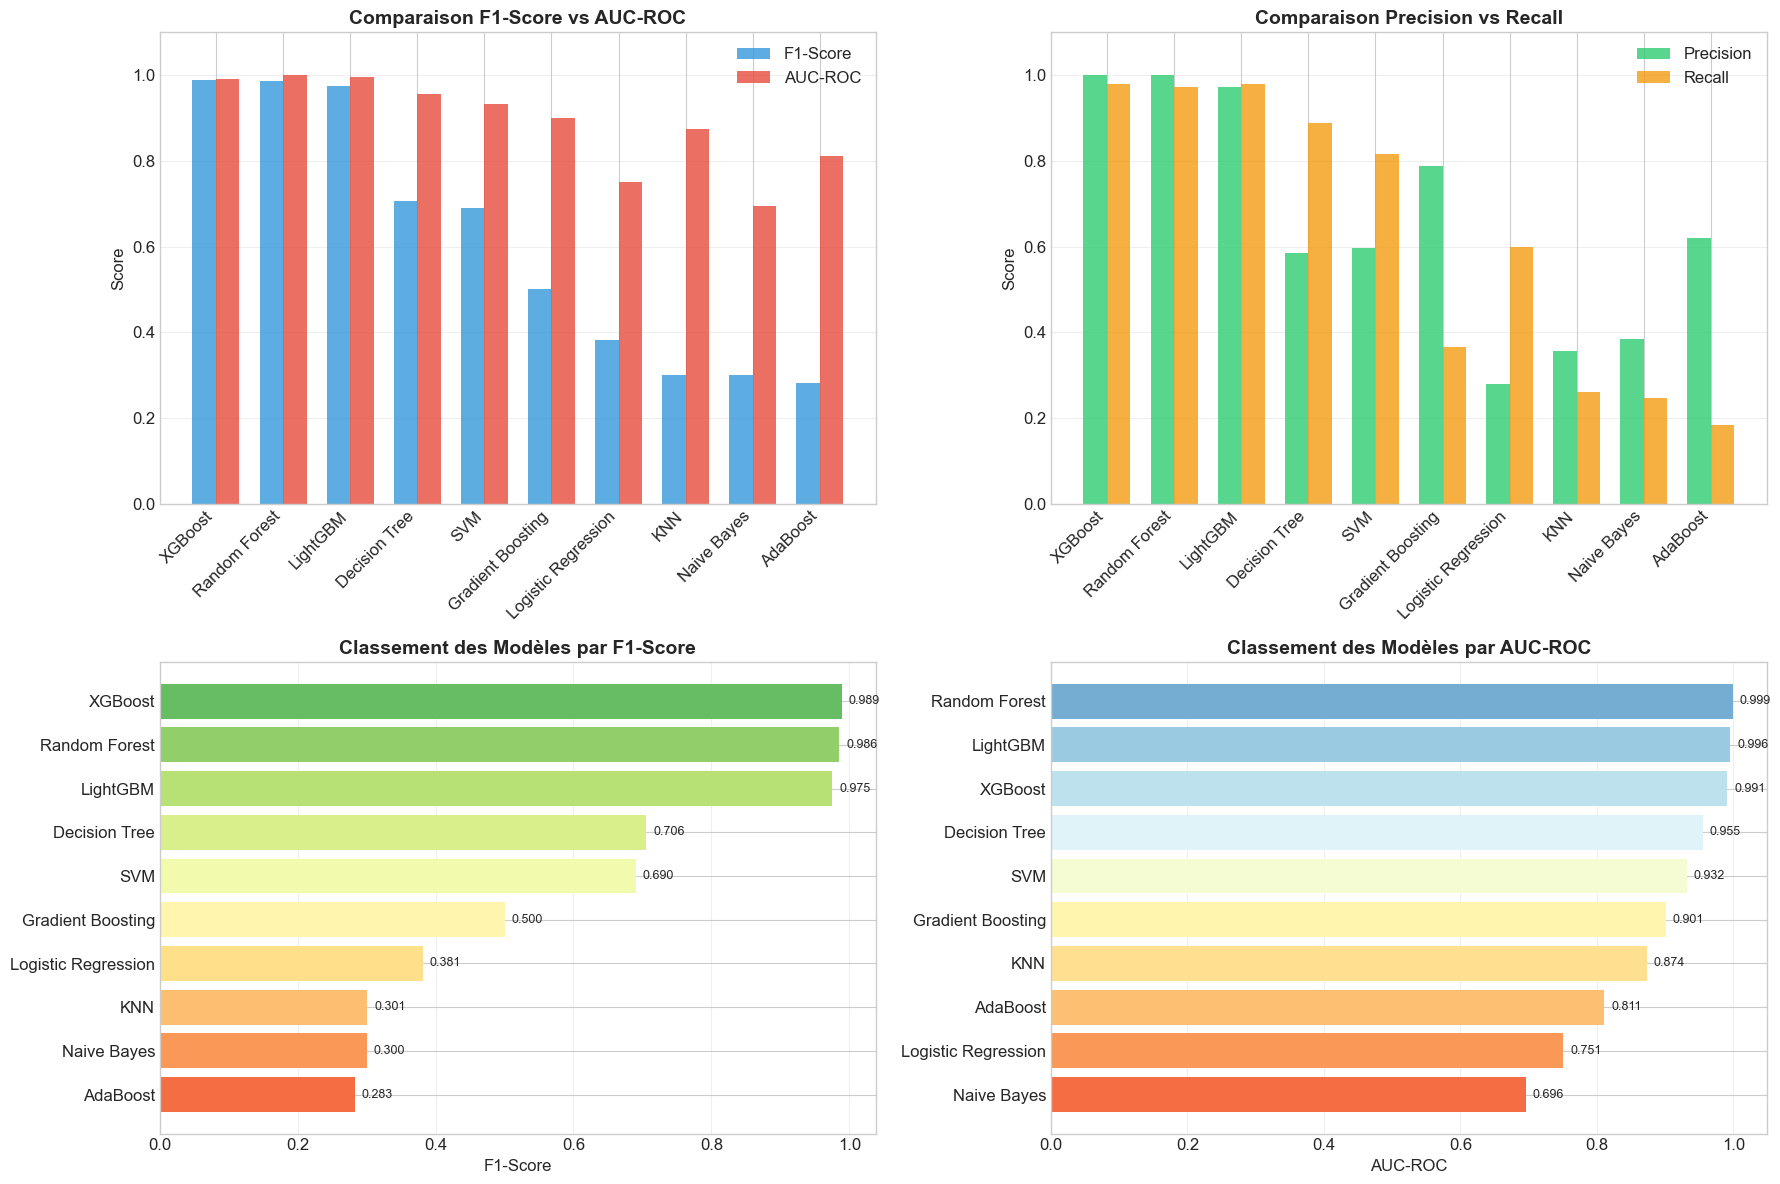


✓ Visualisations comparatives de 10 modèles complétées


In [32]:
# Comparaison avec graphique en barres empilées
try:
    if 'results_df' in globals() and results_df is not None:
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        
        x_pos = np.arange(len(results_df))
        width = 0.35
        
        # Graphique 1: F1-Score et AUC-ROC
        ax1 = axes[0, 0]
        ax1.bar(x_pos - width/2, results_df['F1-Score'], width, 
                label='F1-Score', color='#3498db', alpha=0.8)
        ax1.bar(x_pos + width/2, results_df['AUC-ROC'], width, 
                label='AUC-ROC', color='#e74c3c', alpha=0.8)
        
        ax1.set_ylabel('Score', fontsize=12)
        ax1.set_title('Comparaison F1-Score vs AUC-ROC', fontsize=14, fontweight='bold')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(results_df.index, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)
        ax1.set_ylim(0, 1.1)
        
        # Graphique 2: Precision vs Recall
        ax2 = axes[0, 1]
        ax2.bar(x_pos - width/2, results_df['Precision'], width, 
                label='Precision', color='#2ecc71', alpha=0.8)
        ax2.bar(x_pos + width/2, results_df['Recall'], width, 
                label='Recall', color='#f39c12', alpha=0.8)
        
        ax2.set_ylabel('Score', fontsize=12)
        ax2.set_title('Comparaison Precision vs Recall', fontsize=14, fontweight='bold')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(results_df.index, rotation=45, ha='right')
        ax2.legend()
        ax2.grid(axis='y', alpha=0.3)
        ax2.set_ylim(0, 1.1)
        
        # Graphique 3: Classement par F1-Score (barres horizontales)
        ax3 = axes[1, 0]
        sorted_df = results_df.sort_values('F1-Score', ascending=True)
        colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(sorted_df)))
        ax3.barh(sorted_df.index, sorted_df['F1-Score'], color=colors)
        ax3.set_xlabel('F1-Score', fontsize=12)
        ax3.set_title('Classement des Modèles par F1-Score', fontsize=14, fontweight='bold')
        ax3.grid(axis='x', alpha=0.3)
        for i, (idx, val) in enumerate(sorted_df['F1-Score'].items()):
            ax3.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=9)
        
        # Graphique 4: Classement par AUC-ROC (barres horizontales)
        ax4 = axes[1, 1]
        sorted_auc = results_df.sort_values('AUC-ROC', ascending=True)
        colors_auc = plt.cm.RdYlBu(np.linspace(0.2, 0.8, len(sorted_auc)))
        ax4.barh(sorted_auc.index, sorted_auc['AUC-ROC'], color=colors_auc)
        ax4.set_xlabel('AUC-ROC', fontsize=12)
        ax4.set_title('Classement des Modèles par AUC-ROC', fontsize=14, fontweight='bold')
        ax4.grid(axis='x', alpha=0.3)
        for i, (idx, val) in enumerate(sorted_auc['AUC-ROC'].items()):
            ax4.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✓ Visualisations comparatives de {len(results_df)} modèles complétées")
    else:
        print("⚠ Graphiques comparatifs: Exécutez d'abord les cellules d'entraînement des modèles (section 7)")
except Exception as e:
    print(f"⚠ Erreur graphiques comparatifs: {e}")

### Courbes ROC

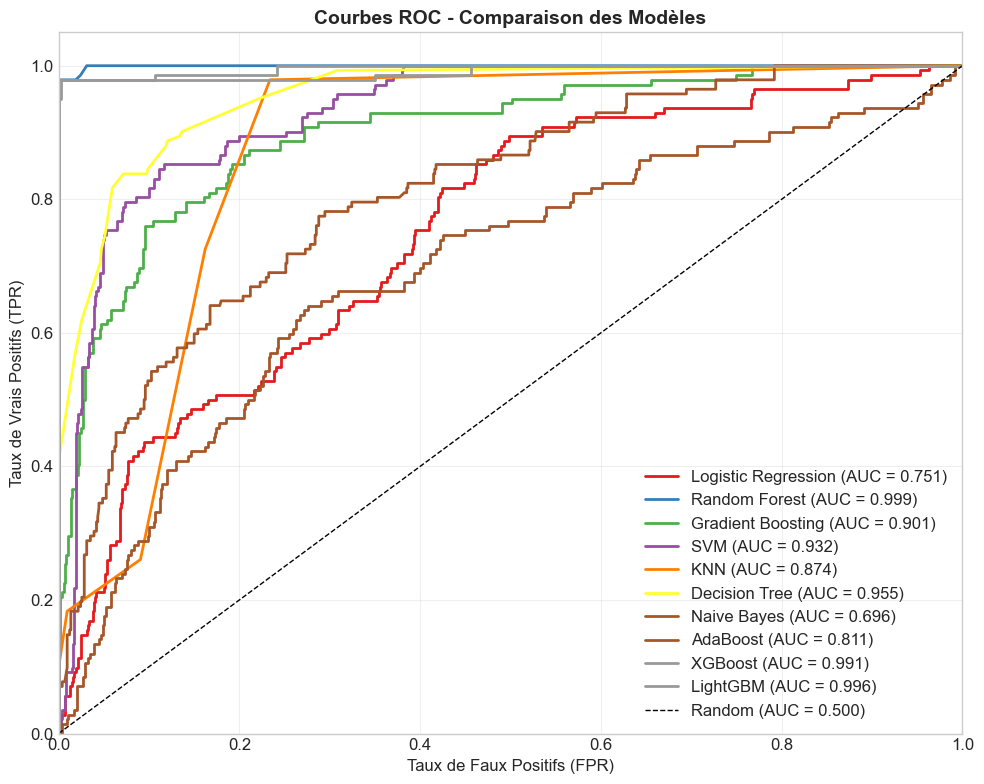

In [33]:
if DATA_READY:
    from sklearn.metrics import auc as auc_score  # Import avec alias pour éviter conflit
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(trained_models)))
    
    for (name, model), color in zip(trained_models.items(), colors):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc_score(fpr, tpr)
        
        ax.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    
    ax.plot([0, 1], [0, 1], 'k--', lw=1, label='Random (AUC = 0.500)')
    
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Taux de Faux Positifs (FPR)')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)')
    ax.set_title('Courbes ROC - Comparaison des Modèles', fontsize=14, fontweight='bold')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Matrices de Confusion

Meilleur modèle: XGBoost


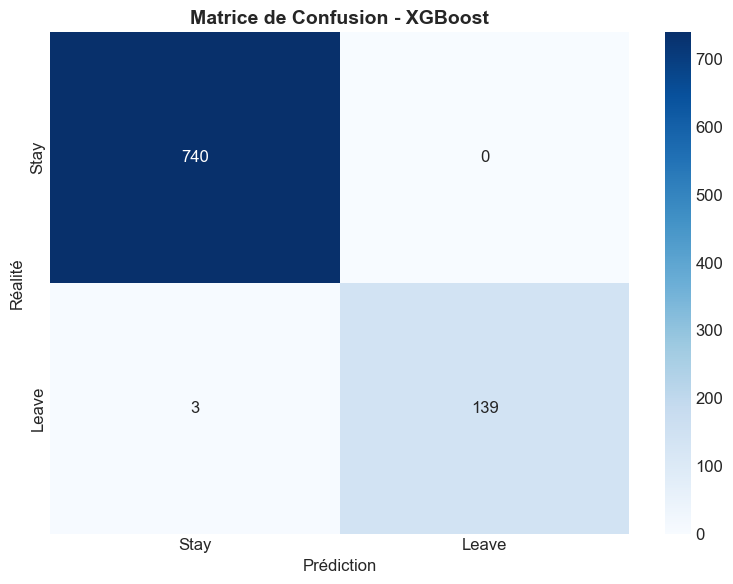


Rapport de Classification:
              precision    recall  f1-score   support

        Stay       1.00      1.00      1.00       740
       Leave       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



In [34]:
if DATA_READY:
    # Sélectionner le meilleur modèle
    best_model_name = results_df['F1-Score'].idxmax()
    best_model = trained_models[best_model_name]
    
    print(f"Meilleur modèle: {best_model_name}")
    
    # Matrice de confusion pour le meilleur modèle
    y_pred_best = best_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred_best)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Stay', 'Leave'],
                yticklabels=['Stay', 'Leave'], ax=ax)
    ax.set_title(f'Matrice de Confusion - {best_model_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Réalité')
    
    plt.tight_layout()
    plt.show()
    
    # Rapport de classification
    print("\nRapport de Classification:")
    print(classification_report(y_test, y_pred_best, target_names=['Stay', 'Leave']))

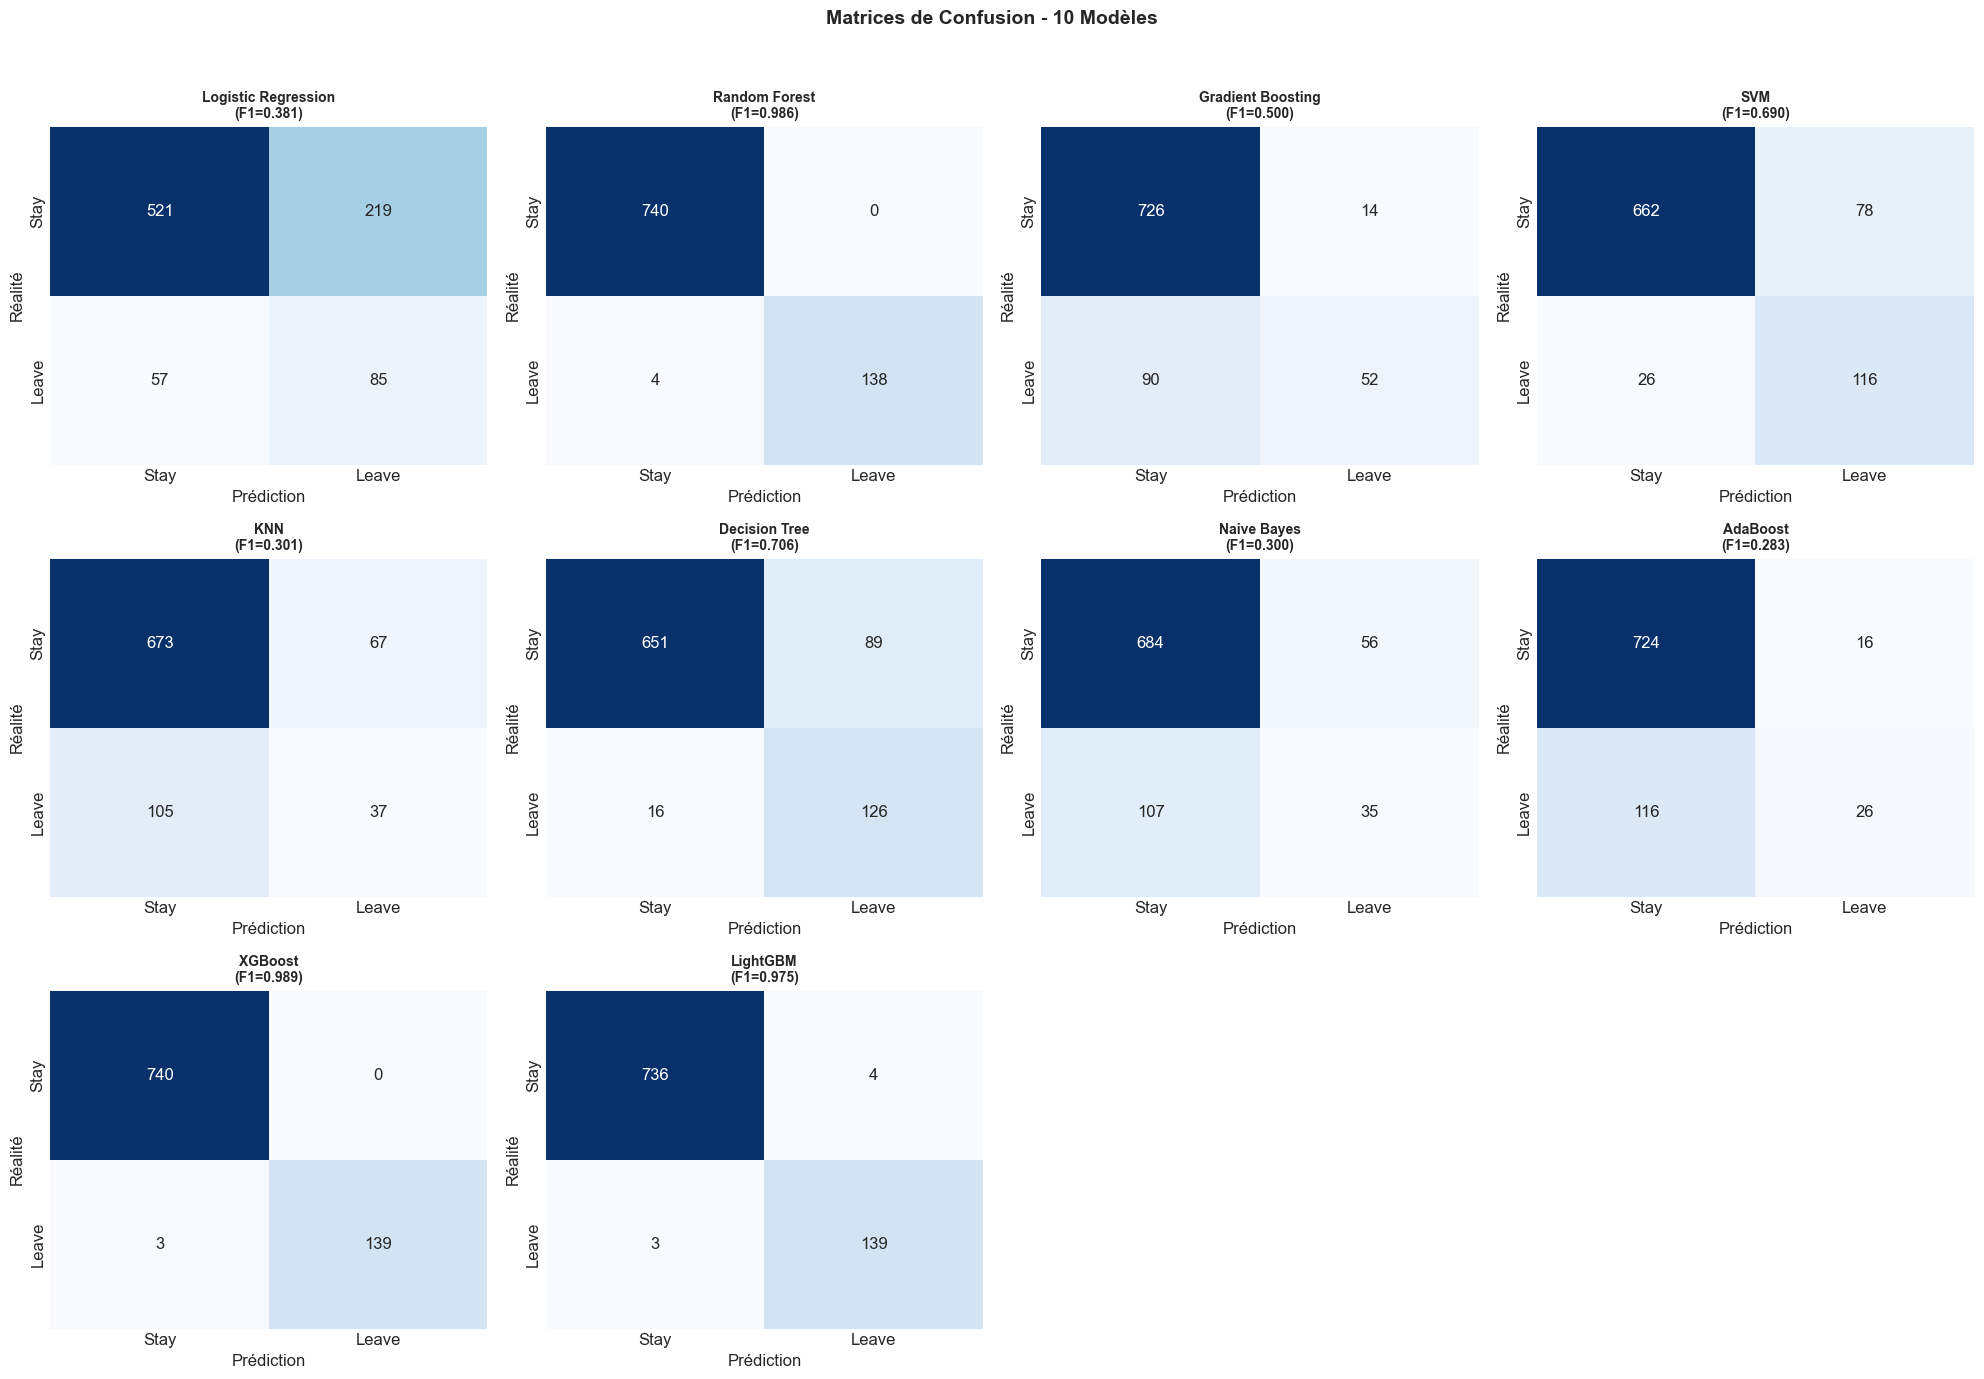

In [35]:
# Comparaison des matrices de confusion pour tous les modèles
if DATA_READY and len(trained_models) > 1:
    n_models = len(trained_models)
    n_cols = 4  # 4 colonnes pour mieux afficher tous les modèles
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4.5*n_rows))
    axes = axes.ravel()
    
    for idx, (name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(X_test_scaled)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Stay', 'Leave'],
                    yticklabels=['Stay', 'Leave'], ax=axes[idx],
                    cbar=False)
        
        # Ajouter F1-score dans le titre
        f1 = results_df.loc[name, 'F1-Score']
        axes[idx].set_title(f'{name}\n(F1={f1:.3f})', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Prédiction')
        axes[idx].set_ylabel('Réalité')
    
    # Masquer les sous-graphiques inutilisés
    for idx in range(n_models, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Matrices de Confusion - {n_models} Modèles', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

---
## 9. Importance des Features

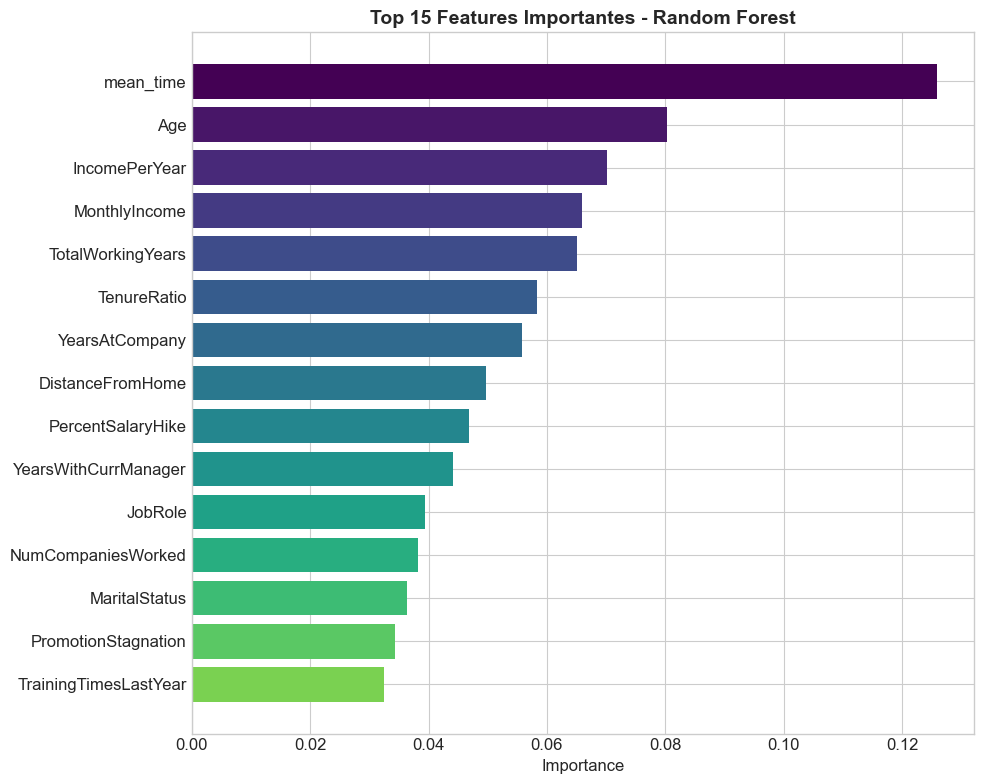


Importance des Features:


,Feature,Importance
27,mean_time,0.1259
0,Age,0.0803
31,IncomePerYear,0.0701
11,MonthlyIncome,0.0660
17,TotalWorkingYears,0.0651
28,TenureRatio,0.0583
19,YearsAtCompany,0.0558
3,DistanceFromHome,0.0498
14,PercentSalaryHike,0.0469
21,YearsWithCurrManager,0.0441


In [36]:
if DATA_READY and 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    
    # Feature importance
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Top 15 features
    top_n = min(15, len(importance_df))
    top_features = importance_df.head(top_n)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    colors = plt.cm.viridis(np.linspace(0, 0.8, top_n))
    ax.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color=colors[::-1])
    
    ax.set_title(f'Top {top_n} Features Importantes - Random Forest', fontsize=14, fontweight='bold')
    ax.set_xlabel('Importance')
    
    plt.tight_layout()
    plt.show()
    
    print("\nImportance des Features:")
    display(importance_df.head(15).round(4))

### Interprétabilité avec SHAP (si disponible)

In [37]:
if DATA_READY and SHAP_AVAILABLE and 'Random Forest' in trained_models:
    print("Analyse SHAP...")
    
    try:
        # Créer l'explainer
        explainer = shap.TreeExplainer(trained_models['Random Forest'])
        
        # Calculer les valeurs SHAP sur un échantillon
        sample_size = min(100, len(X_test))
        X_sample = X_test.iloc[:sample_size]
        shap_values = explainer.shap_values(X_sample)
        
        # Summary plot
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values[1], X_sample, plot_type="bar", max_display=15, show=False)
        plt.title('SHAP Feature Importance', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Erreur SHAP: {e}")
elif not SHAP_AVAILABLE:
    print("SHAP non disponible. Installez avec: pip install shap")

Analyse SHAP...
Erreur SHAP: The shape of the shap_values matrix does not match the shape of the provided data matrix.


<Figure size 1200x800 with 0 Axes>

---
## 10. Benchmarks et Résumé des Performances

In [38]:
if DATA_READY:
    print("=" * 60)
    print("RÉSUMÉ DES BENCHMARKS")
    print("=" * 60)
    
    print(f"\nPerformance des {len(trained_models)} Modèles sur l'ensemble de test:")
    print("-" * 60)
    display(results_df.round(4))
    
    print(f"\nMeilleur modèle: {best_model_name}")
    print(f"   • F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
    print(f"   • AUC-ROC: {results_df.loc[best_model_name, 'AUC-ROC']:.4f}")
    print(f"   • Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")
    
    # Top 3 modèles
    print(f"\n Top 3 Modèles (par F1-Score):")
    for i, (model_name, row) in enumerate(results_df.head(3).iterrows(), 1):
        print(f"   {i}. {model_name}: F1={row['F1-Score']:.4f}, AUC={row['AUC-ROC']:.4f}")
    
    print("\nStatistiques du Dataset:")
    print("-" * 60)
    print(f"   • Total employés: {len(df)}")
    print(f"   • Train set: {len(X_train)}")
    print(f"   • Test set: {len(X_test)}")
    print(f"   • Features: {len(X.columns)}")
    print(f"   • Taux d'attrition global: {y.mean()*100:.1f}%")

RÉSUMÉ DES BENCHMARKS

Performance des 10 Modèles sur l'ensemble de test:
------------------------------------------------------------


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Model,,,,,
XGBoost,0.9966,1.0000,0.9789,0.9893,0.9911
Random Forest,0.9955,1.0000,0.9718,0.9857,0.9995
LightGBM,0.9921,0.9720,0.9789,0.9754,0.9958
Decision Tree,0.8810,0.5860,0.8873,0.7059,0.9552
SVM,0.8821,0.5979,0.8169,0.6905,0.9320
Gradient Boosting,0.8821,0.7879,0.3662,0.5000,0.9009
Logistic Regression,0.6871,0.2796,0.5986,0.3812,0.7510
KNN,0.8050,0.3558,0.2606,0.3008,0.8738
Naive Bayes,0.8152,0.3846,0.2465,0.3004,0.6958



Meilleur modèle: XGBoost
   • F1-Score: 0.9893
   • AUC-ROC: 0.9911
   • Recall: 0.9789

 Top 3 Modèles (par F1-Score):
   1. XGBoost: F1=0.9893, AUC=0.9911
   2. Random Forest: F1=0.9857, AUC=0.9995
   3. LightGBM: F1=0.9754, AUC=0.9958

Statistiques du Dataset:
------------------------------------------------------------
   • Total employés: 4410
   • Train set: 3528
   • Test set: 882
   • Features: 32
   • Taux d'attrition global: 16.1%


---
## 11. Conclusions et Recommandations

### Résumé des Résultats

Cette analyse du taux d'attrition des employés de HumanForYou a permis d'identifier plusieurs enseignements clés :

#### Facteurs d'Attrition Identifiés

Les principaux facteurs influençant l'attrition des employés sont (basés sur l'importance des features) :

1. **Satisfaction au travail** - Un faible niveau de satisfaction est fortement corrélé au départ
2. **Équilibre vie professionnelle/personnelle** - Les employés insatisfaits de cet équilibre sont plus susceptibles de partir
3. **Ancienneté dans l'entreprise** - Les employés avec peu d'ancienneté présentent un risque plus élevé
4. **Revenu mensuel** - Une rémunération inférieure augmente le risque d'attrition
5. **Distance du domicile** - Les longs trajets sont un facteur de risque

### Recommandations pour HumanForYou

#### Actions à Court Terme
- **Programme de rétention ciblé** pour les employés identifiés à risque
- **Entretiens de rétention** réguliers avec les managers
- **Révision salariale** pour les postes à forte attrition

#### Actions à Moyen Terme
- **Plans de carrière personnalisés** pour améliorer la satisfaction
- **Politique de télétravail** pour réduire l'impact des trajets
- **Programmes de formation** pour développer l'engagement

#### Actions à Long Terme
- **Système de monitoring** pour suivre les indicateurs d'attrition en temps réel
- **Culture d'entreprise** axée sur le bien-être et l'équilibre
- **Tableaux de bord RH** pour anticiper les départs

### Limites de l'Analyse

- Les modèles sont entraînés sur des données historiques et peuvent ne pas capturer tous les facteurs d'attrition
- Certaines variables qualitatives (satisfaction, performance) sont subjectives
- Le déséquilibre des classes (15% d'attrition) peut affecter les prédictions
- Les données de badgeage n'ont pas été intégrées dans cette version

### Prochaines Étapes

1. **Intégrer les données de badgeage** pour enrichir les features
2. **Affiner le modèle** avec un tuning des hyperparamètres plus poussé
3. **Déployer le modèle** en production pour des prédictions en temps réel
4. **Mettre en place un monitoring** de la performance du modèle
5. **Former les équipes RH** à l'interprétation des résultats

In [ ]:
print("\n" + "=" * 60)
print("ANALYSE TERMINÉE")
print("=" * 60)
print("\nLivrables disponibles:")
print("  • livrables/01_ethique.md - Document éthique")
print("  • livrables/02_bibliographie.md - Bibliographie")
print("  • livrables/LivCODE.ipynb - Ce notebook")
print("\nCode source:")
print("  • src/data_loader.py - Chargement des données")
print("  • src/data_preprocessing.py - Prétraitement")
print("  • src/feature_engineering.py - Feature engineering")
print("  • src/models.py - Modèles ML")
print("  • src/visualization.py - Visualisations")
print("\nPour toute question: consultez le README.md")


ANALYSE TERMINÉE

Livrables disponibles:
  • livrables/01_ethique.md - Document éthique
  • livrables/02_bibliographie.md - Bibliographie
  • livrables/03_presentation_notebook.ipynb - Ce notebook

Code source:
  • src/data_loader.py - Chargement des données
  • src/data_preprocessing.py - Prétraitement
  • src/feature_engineering.py - Feature engineering
  • src/models.py - Modèles ML
  • src/visualization.py - Visualisations

Pour toute question: consultez le README.md
